# <font color = "green">**Tìm hiểu và trực quan hóa dữ liệu cho avocado dataset**</font> 

**nguồn dữ liệu:** https://www.kaggle.com/datasets/timmate/avocado-prices-2020

**CẬP NHẬT:**

Cập nhật vào ngày 26 tháng 2 năm 2021 với dữ liệu HAB mới nhất cho năm 2020 (lên đến 2020-11-29).

**Bối cảnh (Context):**

Đây là phiên bản cập nhật của tập dữ liệu bơ ban đầu được biên soạn từ dữ liệu của Hass Avocado Board (hay viết tắt là HAB) và được Justin Kiggins xuất bản trên Kaggle vào năm 2018. Tập dữ liệu bao gồm dữ liệu lịch sử về giá bơ và khối lượng bán bơ ở nhiều thành phố, tiểu bang và các vùng của Hoa Kỳ.

**YÊU CẦU:**

tìm hiểu và trực quan hóa dữ liệu cho tập dữ liệu avocado

# <font color = "blue">**Phần A. Chuẩn bị và làm sạch dữ liệu**</font>

# Connect Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# đường dẫn thư mục sẽ làm việc
# tránh đặt tên tập tin thư mục có dấu và khoảng trắng !!!
WorkingPath = "/content/drive/MyDrive/tập huấn TTTH/Avocado project/"
%cd $WorkingPath

%pwd

/content/drive/MyDrive/tập huấn TTTH/Avocado project


'/content/drive/MyDrive/tập huấn TTTH/Avocado project'

# Import Libraries

In [ ]:
#pip install matplotlib==3.4.2
!pip install matplotlib==3.5.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [ ]:
import warnings
warnings.filterwarnings("ignore")

# 1) Read File

In [ ]:
data_avocado = pd.read_csv('avocado-updated-2020.csv')
data_avocado.head(3)

date  average_price  total_volume       4046      4225   4770  \
0  2015-01-04           1.22      40873.28    2819.50  28287.42  49.90   
1  2015-01-04           1.79       1373.95      57.42    153.88   0.00   
2  2015-01-04           1.00     435021.49  364302.39  23821.16  82.15   

   total_bags  small_bags  large_bags  xlarge_bags          type  year  \
0     9716.46     9186.93      529.53          0.0  conventional  2015   
1     1162.65     1162.65        0.00          0.0       organic  2015   
2    46815.79    16707.15    30108.64          0.0  conventional  2015   

  geography  
0    Albany  
1    Albany  
2   Atlanta

**Mô tả dữ liệu:**

    Date - Ngày quan sát

    AveragePrice - giá trung bình của một quả bơ

    Total Volume – tổng số bơ đã bán

    4046 – tổng số bơ có mã PLU 4046 đã bán (Bơ Hass vừa / nhỏ nặng ~ 3-5 Ounce)

    4225 - tổng số bơ có mã PLU 4225 đã bán (Bơ Hass lớn nặng ~ 8-10 Ounce)

    4770 - tổng số bơ có mã PLU 4770 đã bán (Bơ Hass Cực Lớn nặng ~ 10-15 Ounce)

    Total Bags – tổng số túi đã bán

    Small/Large/XLarge Bags – tổng số túi đã bán theo size

    Type - thông thường (conventional) hoặc hữu cơ (organic)

    year - năm

    geography - thành phố hoặc khu vực quan sát (bao gồm toàn bộ nước mỹ, vùng, bang, Thành phố)

**ghi chú:**

PLU hay là Price Look Up là một phương pháp dùng kí hiệu mã vạch ở các siêu thị từ những năm 1990 để kiểm soát việc bán ra và kiểm kê hàng tồn kho một cách nhanh hơn, dễ dàng và chính xác hơn. Mã PLU được sử dụng cho các sản phẩm có số lượng lớn (và một số mặt hàng liên quan như các loại hạt và rau thơm).

# 2) nhận xét:

'total_bags' = 'small_bags' + 'large_bags' + 'xlarge_bags'

'total_volume' = '4046' + '4225' + '4770' + (bơ không có mã) và (bơ có mã khác)

'date' = có chứa cột 'year'

dữ liệu được thu thập ở các vùng địa lý bị chồng chéo lên nhau

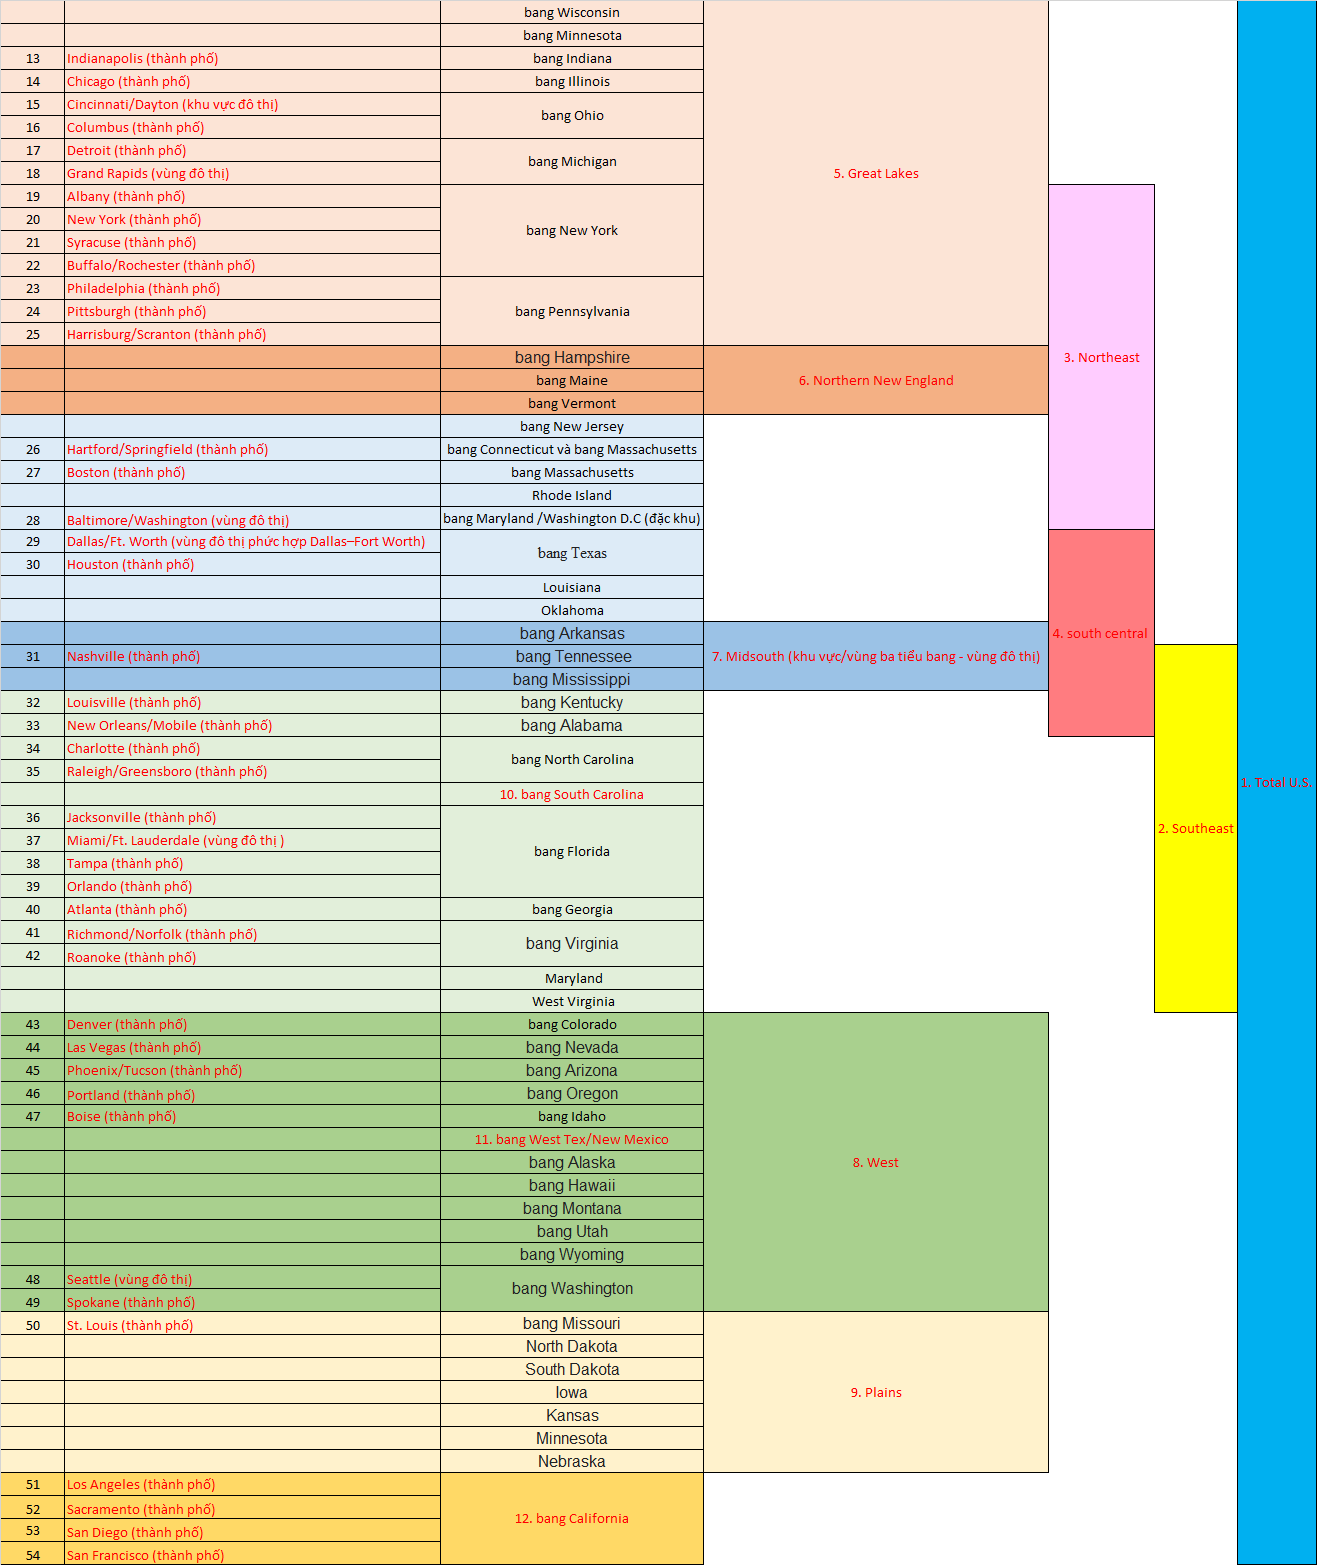

# 3) data.info

In [ ]:
data_avocado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33045 entries, 0 to 33044
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           33045 non-null  object 
 1   average_price  33045 non-null  float64
 2   total_volume   33045 non-null  float64
 3   4046           33045 non-null  float64
 4   4225           33045 non-null  float64
 5   4770           33045 non-null  float64
 6   total_bags     33045 non-null  float64
 7   small_bags     33045 non-null  float64
 8   large_bags     33045 non-null  float64
 9   xlarge_bags    33045 non-null  float64
 10  type           33045 non-null  object 
 11  year           33045 non-null  int64  
 12  geography      33045 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 3.3+ MB


In [ ]:
number_type = [f for f in data_avocado.columns if data_avocado.dtypes[f] != 'object']
print ("các cột đã là dạng số:", number_type)

object_type = [f for f in data_avocado.columns if data_avocado.dtypes[f] == 'object']
print ("các cột đang là dạng string:", object_type)

các cột đã là dạng số: ['average_price', 'total_volume', '4046', '4225', '4770', 'total_bags', 'small_bags', 'large_bags', 'xlarge_bags', 'year']
các cột đang là dạng string: ['date', 'type', 'geography']


# 4) kiểm tra null

In [ ]:
# đếm giá trị null
count_nan_in_data = data_avocado.isnull().sum()
print (count_nan_in_data)

# lấy index của vị trí null
#whereIsNaN = np.where(data['tên cột'].isnull() == True)
#print('vị trí tên cột có giá trị NaN: ', whereIsNaN)

date             0
average_price    0
total_volume     0
4046             0
4225             0
4770             0
total_bags       0
small_bags       0
large_bags       0
xlarge_bags      0
type             0
year             0
geography        0
dtype: int64


# 5) data shape

In [ ]:
# xem dữ liệu có bao nhiêu dòng, cột
data_avocado.shape

(33045, 13)

# 6) có quan sát trùng nhau không

In [ ]:
# kiểm tra xem có dòng nào bị trùng không 
print('dữ liệu có dòng trùng lặp hay không, true là có trùng, False là không trùng: kết quả là ', data_avocado.duplicated().any())

# đếm số lượng dòng trùng lặp
count_dupli_in_data = data_avocado.duplicated().sum()
print ('số lượng dòng trùng lặp: ', count_dupli_in_data)

# lấy index của vị trí trùng lặp
a = data_avocado.duplicated(keep=False)
for i in range(len(a)):
  if a[i] == True:
    print('dòng trùng: ', i)

dữ liệu có dòng trùng lặp hay không, true là có trùng, False là không trùng: kết quả là  False
số lượng dòng trùng lặp:  0


# 7) xử lý biến type

In [ ]:
# factorize biến type
categoricalType = pd.Categorical(data_avocado['type'])
codesType, uniquesType = pd.factorize(categoricalType)

print('codesType : ', codesType)
print('uniquesType : ', uniquesType)

codesType :  [0 1 0 ... 1 0 1]
uniquesType :  ['conventional', 'organic']
Categories (2, object): ['conventional', 'organic']


In [ ]:
# thay đổi biến type thành biến phân loại
data_avocado['type'] = categoricalType

# mô tả thống kê
data_avocado['type'].describe()

count            33045
unique               2
top       conventional
freq             16524
Name: type, dtype: object

# 8) xử lý biến geography

In [ ]:
# factorize biến geography
categoricalGeography = pd.Categorical(data_avocado['geography'])
codesGeography, uniquesGeography = pd.factorize(categoricalGeography)

print('codesGeography : ', codesGeography)
print('uniquesGeography : ', uniquesGeography)

codesGeography :  [ 0  0  1 ... 52 53 53]
uniquesGeography :  ['Albany', 'Atlanta', 'Baltimore/Washington', 'Boise', 'Boston', ..., 'Syracuse', 'Tampa', 'Total U.S.', 'West', 'West Tex/New Mexico']
Length: 54
Categories (54, object): ['Albany', 'Atlanta', 'Baltimore/Washington', 'Boise', ..., 'Tampa',
                          'Total U.S.', 'West', 'West Tex/New Mexico']


In [ ]:
# thay đổi biến geography thành biến phân loại
data_avocado['geography'] = categoricalGeography

# mô tả thống kê
data_avocado['geography'].describe()

count      33045
unique        54
top       Albany
freq         612
Name: geography, dtype: object

# 9) thêm cột day và xử lý cột day

In [ ]:
data_avocado['date'] = pd.to_datetime(data_avocado['date'])
data_avocado['day'] = data_avocado['date'].apply(lambda date: date.day)
data_avocado.head(3)

date  average_price  total_volume       4046      4225   4770  \
0 2015-01-04           1.22      40873.28    2819.50  28287.42  49.90   
1 2015-01-04           1.79       1373.95      57.42    153.88   0.00   
2 2015-01-04           1.00     435021.49  364302.39  23821.16  82.15   

   total_bags  small_bags  large_bags  xlarge_bags          type  year  \
0     9716.46     9186.93      529.53          0.0  conventional  2015   
1     1162.65     1162.65        0.00          0.0       organic  2015   
2    46815.79    16707.15    30108.64          0.0  conventional  2015   

  geography  day  
0    Albany    4  
1    Albany    4  
2   Atlanta    4

In [ ]:
# factorize biến day
categoricalDay = pd.Categorical(data_avocado['day'])
codesDay, uniquesDay = pd.factorize(categoricalDay)

print('codesDay : ', codesDay)
print('uniquesDay : ', uniquesDay)

codesDay :  [0 0 0 ... 8 8 8]
uniquesDay :  [4, 11, 18, 25, 1, ..., 30, 6, 13, 20, 27]
Length: 31
Categories (31, int64): [1, 2, 3, 4, ..., 28, 29, 30, 31]


In [ ]:
# thay đổi biến day thành biến phân loại
data_avocado['day'] = categoricalDay

# mô tả thống kê
data_avocado['day'].describe()

count     33045
unique       31
top           1
freq       1404
Name: day, dtype: int64

# 10) thêm cột month và xử lý biến month

In [ ]:
#data_avocado['date'] = pd.to_datetime(data_avocado['date'])
data_avocado['month'] = data_avocado['date'].apply(lambda date: date.month)
data_avocado.head(3)

date  average_price  total_volume       4046      4225   4770  \
0 2015-01-04           1.22      40873.28    2819.50  28287.42  49.90   
1 2015-01-04           1.79       1373.95      57.42    153.88   0.00   
2 2015-01-04           1.00     435021.49  364302.39  23821.16  82.15   

   total_bags  small_bags  large_bags  xlarge_bags          type  year  \
0     9716.46     9186.93      529.53          0.0  conventional  2015   
1     1162.65     1162.65        0.00          0.0       organic  2015   
2    46815.79    16707.15    30108.64          0.0  conventional  2015   

  geography day  month  
0    Albany   4      1  
1    Albany   4      1  
2   Atlanta   4      1

In [ ]:
# factorize biến month
categoricalMonth = pd.Categorical(data_avocado['month'])
codesMonth, uniquesMonth = pd.factorize(categoricalMonth)

print('codesMonth : ', codesMonth)
print('uniquesMonth : ', uniquesMonth)

codesMonth :  [ 0  0  0 ... 10 10 10]
uniquesMonth :  [1, 2, 3, 4, 5, ..., 8, 9, 10, 11, 12]
Length: 12
Categories (12, int64): [1, 2, 3, 4, ..., 9, 10, 11, 12]


In [ ]:
# thay đổi biến month thành biến phân loại
data_avocado['month'] = categoricalMonth

# mô tả thống kê
data_avocado['month'].describe()

count     33045
unique       12
top           1
freq       2916
Name: month, dtype: int64

# 11) xử lý biến year

In [ ]:
# factorize biến year
categoricalYear = pd.Categorical(data_avocado['year'])
codesYear, uniquesYear = pd.factorize(categoricalYear)

print('codesYear : ', codesYear)
print('uniquesYear : ', uniquesYear)

codesYear :  [0 0 0 ... 5 5 5]
uniquesYear :  [2015, 2016, 2017, 2018, 2019, 2020]
Categories (6, int64): [2015, 2016, 2017, 2018, 2019, 2020]


In [ ]:
# thay đổi biến year thành biến phân loại
data_avocado['year'] = categoricalYear

# mô tả thống kê
data_avocado['year'].describe()

count     33045
unique        6
top        2017
freq       5722
Name: year, dtype: int64

# 12) xử lý biến total_bags

từ nhận xét ở trên:

'total_bags' = 'small_bags' + 'large_bags' + 'xlarge_bags'

ta thực hiện các bước sau:

In [ ]:
data_avocado['total_bags2'] = data_avocado['small_bags'] + data_avocado['large_bags'] + data_avocado['xlarge_bags']
data_avocado['err_bags'] = data_avocado['total_bags'] - data_avocado['total_bags2']

indexErrBagsDifferent0 = np.where(data_avocado['err_bags'] != 0)
len(indexErrBagsDifferent0[0])

7890

nhận xét:

    có 7890 quan sát có thể đã bị nhập sai dữ liệu ở một cột nào đó trong 4 cột 'total_bags', 'small_bags', 'large_bags', 'xlarge_bags'

In [ ]:
# tiến hành chỉnh sửa dữ liệu
for i in indexErrBagsDifferent0:
  data_avocado.loc[i, 'total_bags'] = data_avocado.loc[i, 'total_bags2']

# xóa cột 'total_bags2' và 'err_bags'
data_avocado = data_avocado.drop(columns=['total_bags2', 'err_bags'])

# <font color = "blue">**Phần B. Phân tích dữ liệu**</font>

# 13) thống kê mô tả biến 

# average_price, total_volume, 4046, 4225, 4770,

# total_bags, small_bags, large_bags, xlarge_bags

In [ ]:
# thống kê mô tả biến định lượng
data_avocado.describe()

average_price  total_volume          4046          4225          4770  \
count   33045.000000  3.304500e+04  3.304500e+04  3.304500e+04  3.304500e+04   
mean        1.379941  9.683997e+05  3.023914e+05  2.797693e+05  2.148255e+04   
std         0.378972  3.934533e+06  1.301026e+06  1.151052e+06  1.001607e+05   
min         0.440000  8.456000e+01  0.000000e+00  0.000000e+00  0.000000e+00   
25%         1.100000  1.511895e+04  7.673100e+02  2.712470e+03  0.000000e+00   
50%         1.350000  1.291170e+05  1.099477e+04  2.343600e+04  1.780900e+02   
75%         1.620000  5.058285e+05  1.190219e+05  1.352389e+05  5.096530e+03   
max         3.250000  6.371614e+07  2.274362e+07  2.047057e+07  2.546439e+06   

         total_bags    small_bags    large_bags   xlarge_bags  
count  3.304500e+04  3.304500e+04  3.304500e+04  3.304500e+04  
mean   3.646735e+05  2.501980e+05  1.067329e+05  7.742585e+03  
std    1.564004e+06  1.037734e+06  5.167226e+05  4.819803e+04  
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  
25%    9.121860e+03  6.478630e+03  4.662900e+02  0.000000e+00  
50%    5.322224e+04  3.687699e+04  6.375860e+03  0.000000e+00  
75%    1.744314e+05  1.206624e+05  4.041723e+04  8.044400e+02  
max    3.168919e+07  2.055041e+07  1.332760e+07  1.403184e+06

nhận xét:

total_volume, 4046, 4225, 4770, total_bags, small_bags, large_bags, xlarge_bags có:

    độ lệch chuẩn (Standard Deviation) rất lớn, cho thấy sự phân tán dữ liệu rất cao.


# 14) thống kê mô tả biến 

# type, geography, day, month, year

In [ ]:
# thống kê mô tả biến định tính
data_avocado[['type', 'geography', 'day', 'month', 'year']].describe()

type geography    day  month   year
count          33045     33045  33045  33045  33045
unique             2        54     31     12      6
top     conventional    Albany      1      1   2017
freq           16524       612   1404   2916   5722

nhận xét:

    trong tập dữ liệu này ở đây: count, top và freq không có nhiều giá trị ý nghĩa 
    xem xét unique: 
        có thể nhận thấy dữ liệu có 2 type và 54 geography riêng biệt. 
        dữ liệu được lấy trên 6 năm, 
        mỗi năm đều lấy trên cả 12 tháng, 
        chú ý: nhưng mỗi tháng thì không lấy dữ liệu đủ các ngày trong tháng, mà chỉ lấy ngẫu nhiên vài ngày trong 1 tháng

# 15) xem xét sự thay đổi của biến 

# average_price, total_volume, 4046, 4225, 4770,

# total_bags, small_bags, large_bags, xlarge_bags

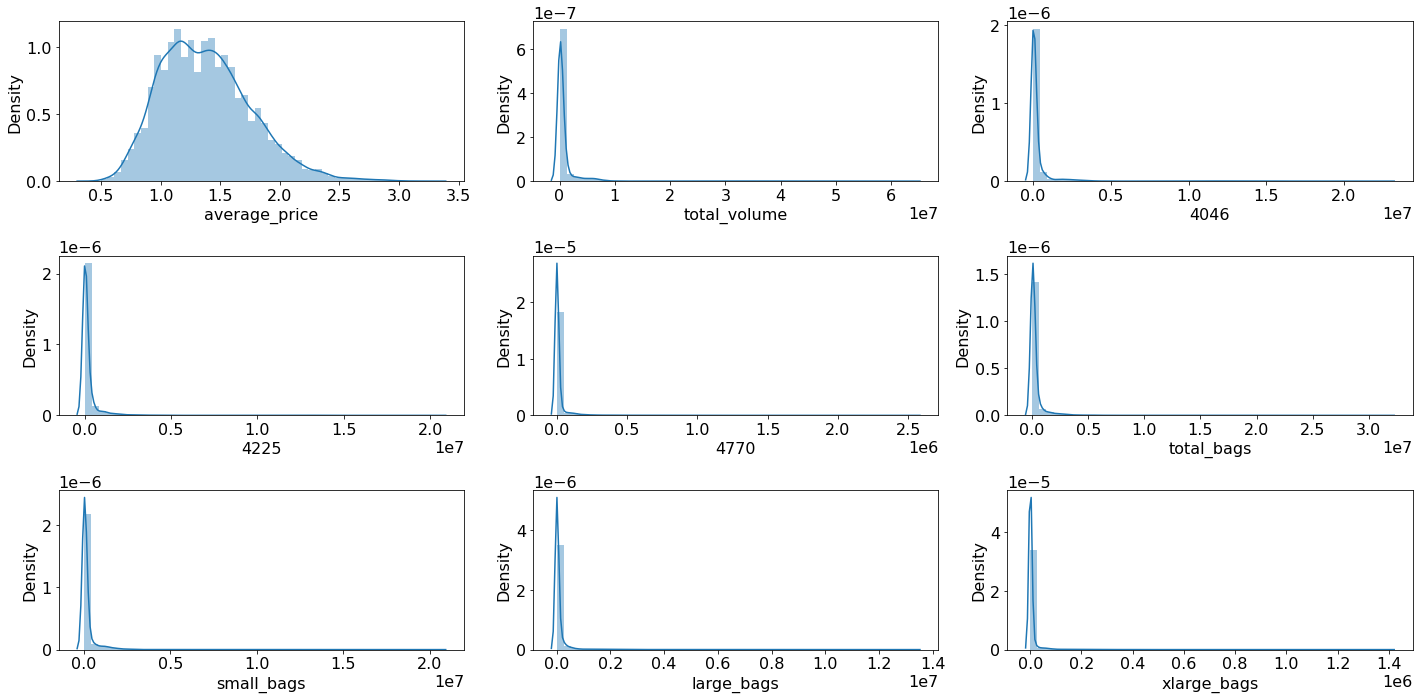

In [ ]:
fig = plt.figure(figsize=(20, 10))

sub1 = plt.subplot(3, 3, 1)
sub1 = sns.distplot(a = data_avocado.average_price)
sub1.ticklabel_format(useOffset=False, style='plain')

sub2 = plt.subplot(3, 3, 2)
sub2 = sns.distplot(a = data_avocado.total_volume)
#sub2.ticklabel_format(useOffset=False, style='plain')

sub3 = plt.subplot(3, 3, 3)
sub3 = sns.distplot(a = data_avocado['4046'])
#sub3.ticklabel_format(useOffset=False, style='plain')

sub4 = plt.subplot(3, 3, 4)
sub4 = sns.distplot(a = data_avocado['4225'])
#sub4.ticklabel_format(useOffset=False, style='plain')

sub5 = plt.subplot(3, 3, 5)
sub5 = sns.distplot(a = data_avocado['4770'])
#sub5.ticklabel_format(useOffset=False, style='plain')

sub6 = plt.subplot(3, 3, 6)
sub6 = sns.distplot(a = data_avocado.total_bags)
#sub6.ticklabel_format(useOffset=False, style='plain')

sub7 = plt.subplot(3, 3, 7)
sub7 = sns.distplot(a = data_avocado.small_bags)
#sub7.ticklabel_format(useOffset=False, style='plain')

sub8 = plt.subplot(3, 3, 8)
sub8 = sns.distplot(a = data_avocado.large_bags)
#sub8.ticklabel_format(useOffset=False, style='plain')

sub9 = plt.subplot(3, 3, 9)
sub9 = sns.distplot(a = data_avocado.xlarge_bags)
#sub9.ticklabel_format(useOffset=False, style='plain')

fig.tight_layout()
plt.show()

- Sao vẫn chưa sửa lại cách trình bày số trên biểu đồ? 1e7 -> ???

nhận xét:

    total_volume, 4046, 4225, 4770, total_bags, small_bags, large_bags, xlarge_bags có những thời điểm đột biến, tăng lên rất cao
    nhưng phần lớn vẫn giữ mức cân bằng. ????

    average_price có sự phân tán ít hơn

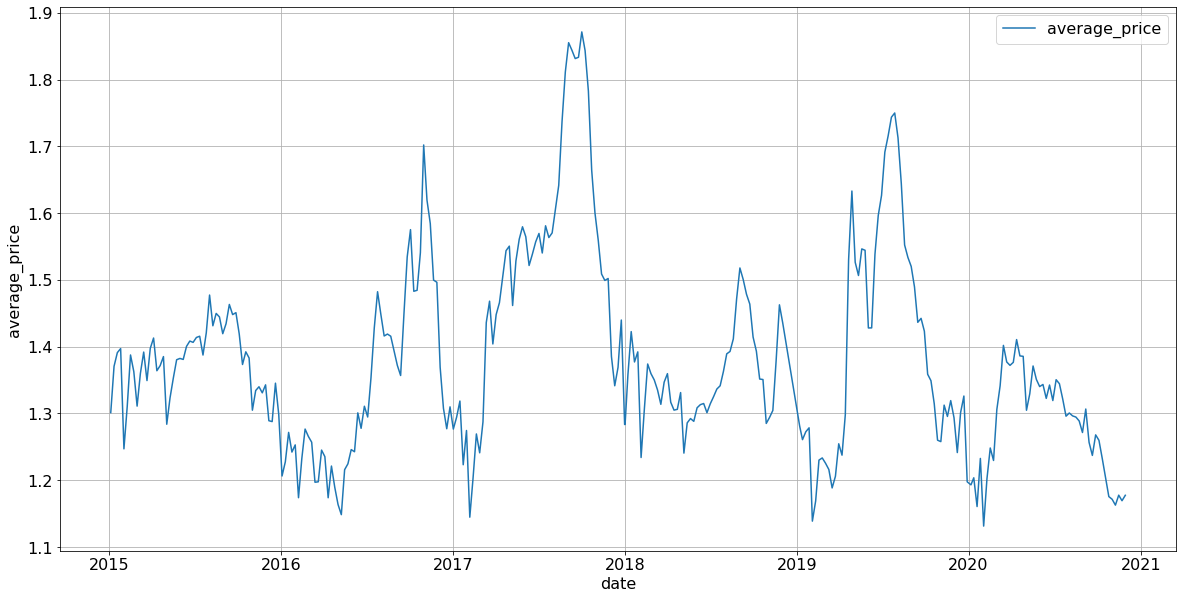

In [ ]:
# Create figure
plt.figure(figsize=(20, 10))
# Plot data
sns.lineplot('date', 'average_price', data=data_avocado, ci=None, label='average_price')
# Add grid
plt.grid()
# Add legend
plt.legend()
# Show plot
plt.show()

nhận xét:

    average_price có sự thay đổi tuần hoàn
    vào năm 2018 có trung bình average_price cao nhất

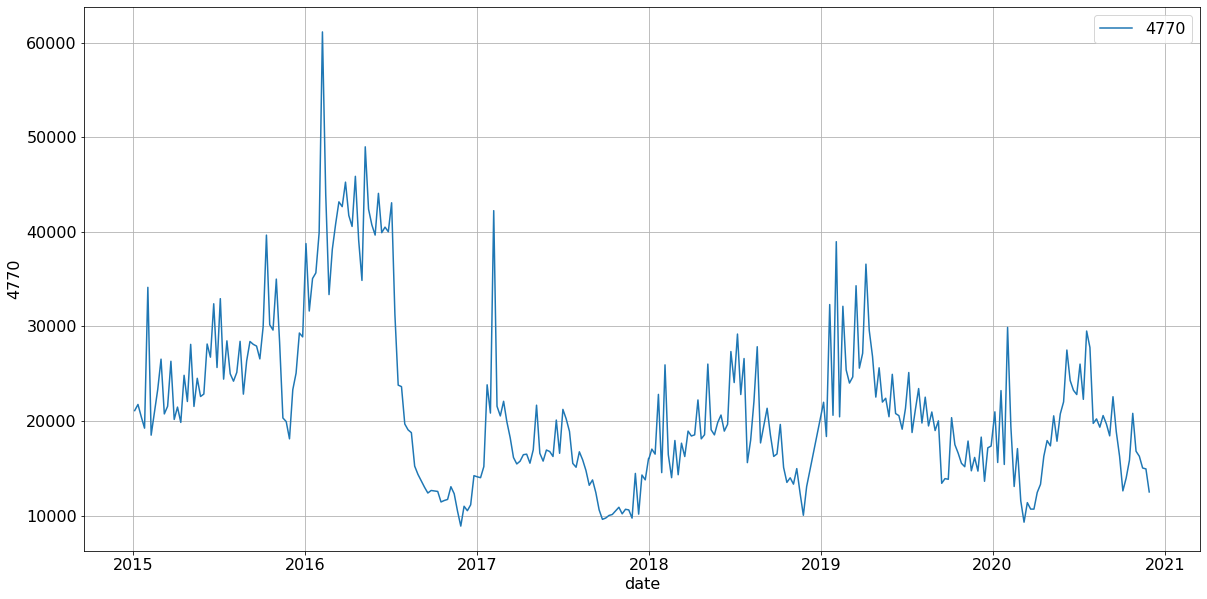

In [ ]:
# Create figure
plt.figure(figsize=(20, 10))
# Plot data
sns.lineplot('date', '4770', data=data_avocado, ci=None, label='4770')
# Add grid
plt.grid()
# Add legend
plt.legend()
# Show plot
plt.show()

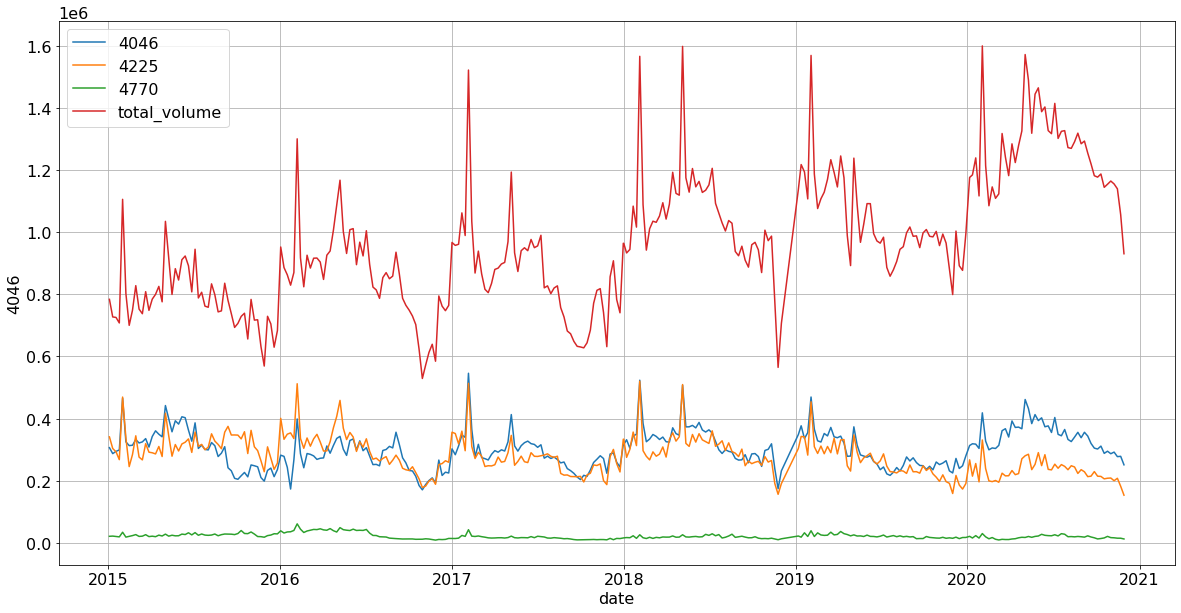

In [ ]:
# Create figure
plt.figure(figsize=(20, 10))
# Plot data
sns.lineplot('date', '4046', data=data_avocado, ci=None, label='4046')
sns.lineplot('date', '4225', data=data_avocado, ci=None, label='4225')
sns.lineplot('date', '4770', data=data_avocado, ci=None, label='4770')
sns.lineplot('date', 'total_volume', data=data_avocado, ci=None, label='total_volume')
# Add grid
plt.grid()
# Add legend
plt.legend()
# Show plot
plt.show()

nhận xét:

    total_volume, 4046, 4225, 4770 có sự thay đổi tuần hoàn và tương quan với nhau
    4770 không đóng góp nhiều vào total_volume

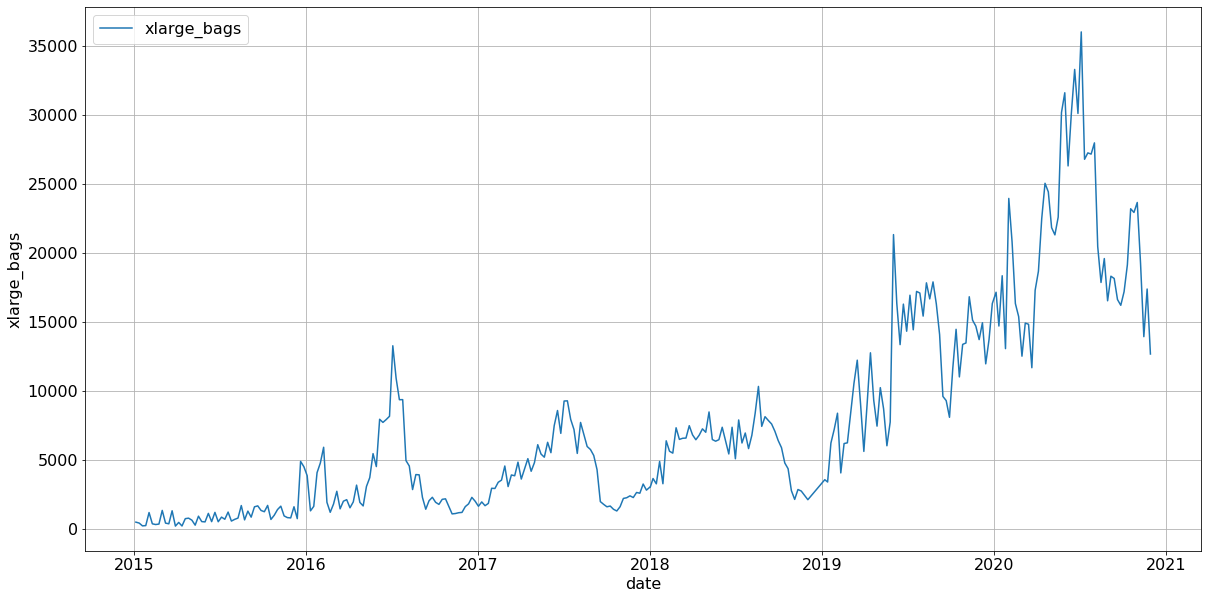

In [ ]:
# Create figure
plt.figure(figsize=(20, 10))
# Plot data
sns.lineplot('date', 'xlarge_bags', data=data_avocado, ci=None, label='xlarge_bags')
# Add grid
plt.grid()
# Add legend
plt.legend()
# Show plot
plt.show()

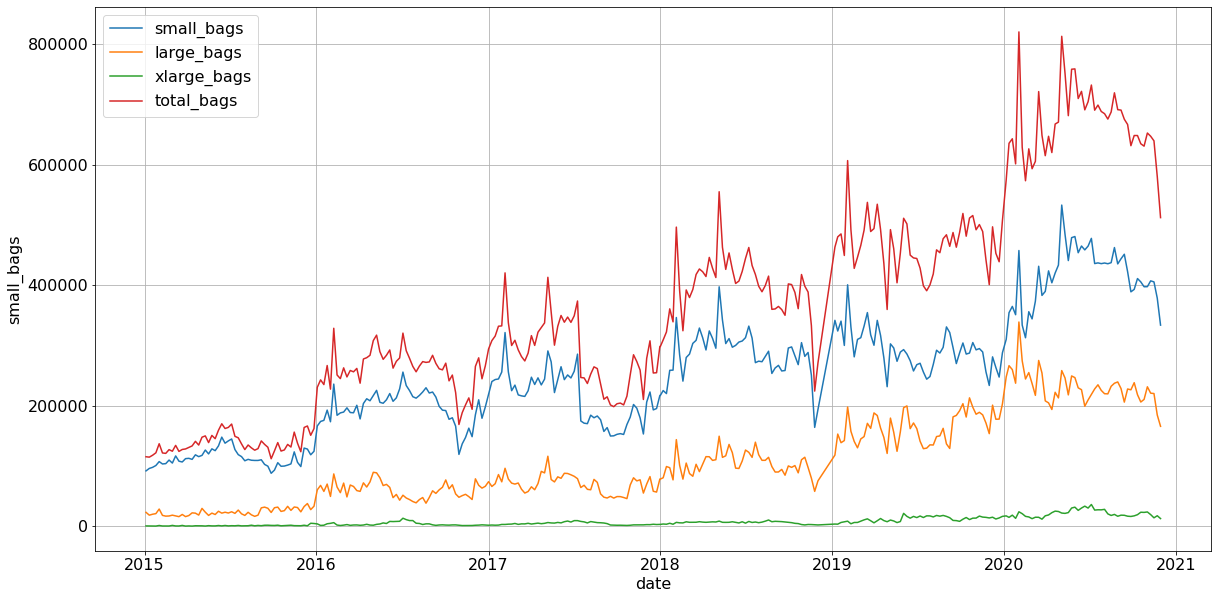

In [ ]:
# Create figure
plt.figure(figsize=(20, 10))
# Plot data
sns.lineplot('date', 'small_bags', data=data_avocado, ci=None, label='small_bags')
sns.lineplot('date', 'large_bags', data=data_avocado, ci=None, label='large_bags')
sns.lineplot('date', 'xlarge_bags', data=data_avocado, ci=None, label='xlarge_bags')
sns.lineplot('date', 'total_bags', data=data_avocado, ci=None, label='total_bags')
# Add grid
plt.grid()
# Add legend
plt.legend()
# Show plot
plt.show()

nhận xét: 

    total_bags, small_bags, large_bags, xlarge_bags có cùng hướng và ngày càng tăng dần

# 16) xem xét sự thay đổi của biến 

# type, geography, day, month, year với y="average_price"

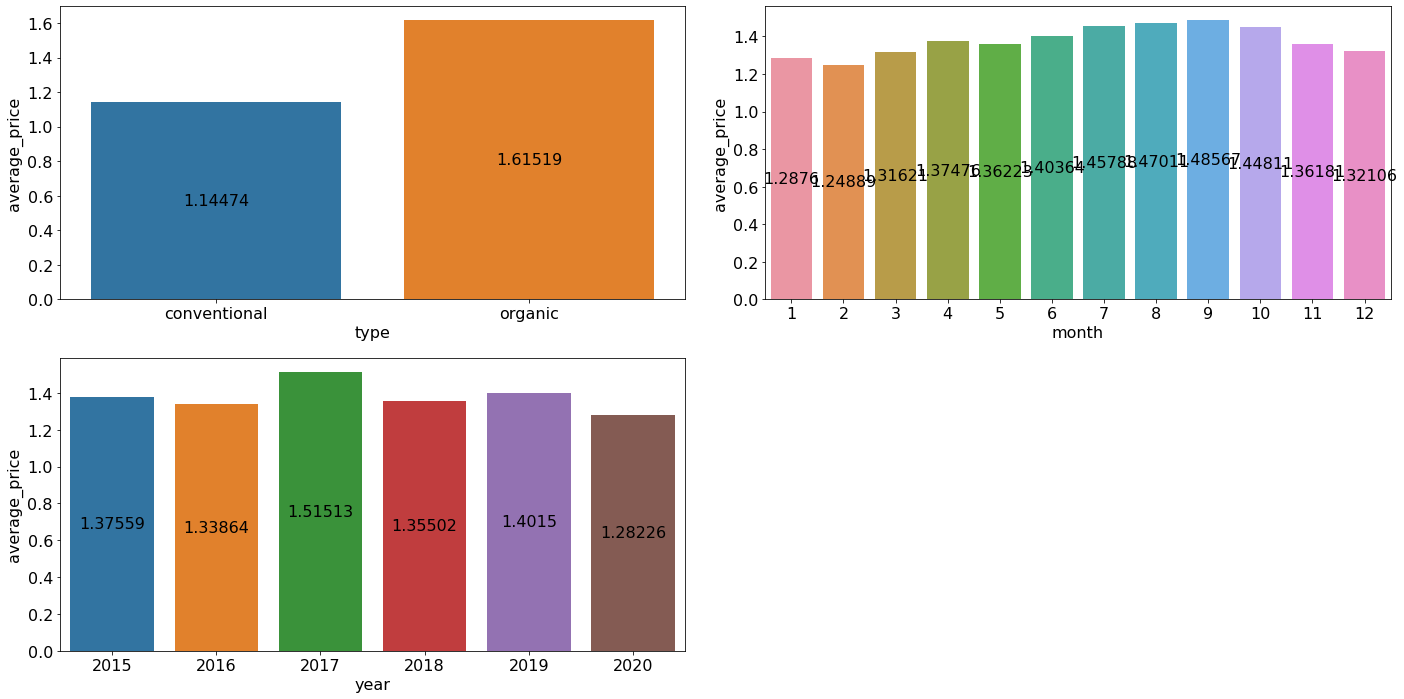

In [ ]:
fig = plt.figure(figsize=(20, 10))

sub1 = plt.subplot(2, 2, 1)
sub1 = sns.barplot(x='type', y="average_price", data=data_avocado, ci = None)
plt.bar_label(sub1.containers[0], label_type='center')

sub2 = plt.subplot(2, 2, 2)
sub2 = sns.barplot(x='month', y="average_price", data=data_avocado, ci = None)
plt.bar_label(sub2.containers[0], label_type='center')

sub3 = plt.subplot(2, 2, 3)
sub3 = sns.barplot(x='year', y="average_price", data=data_avocado, ci = None)
plt.bar_label(sub3.containers[0], label_type='center')

fig.tight_layout()
plt.show()

- Số trên các cột chồng chéo lên nhau!!!
- Làm tròn 2 số thôi

nhận xét:

    trung bình giá của loại bơ organic cao hơn giá của loại bơ conventional rất nhiều
    trung bình giá bơ vào tháng 7,8,9,10 cao hơn các tháng khác
    trung bình giá bơ vào năm 2017 là cao nhất, năm gần nhất 2020 thì giá bơ lại thấp nhất

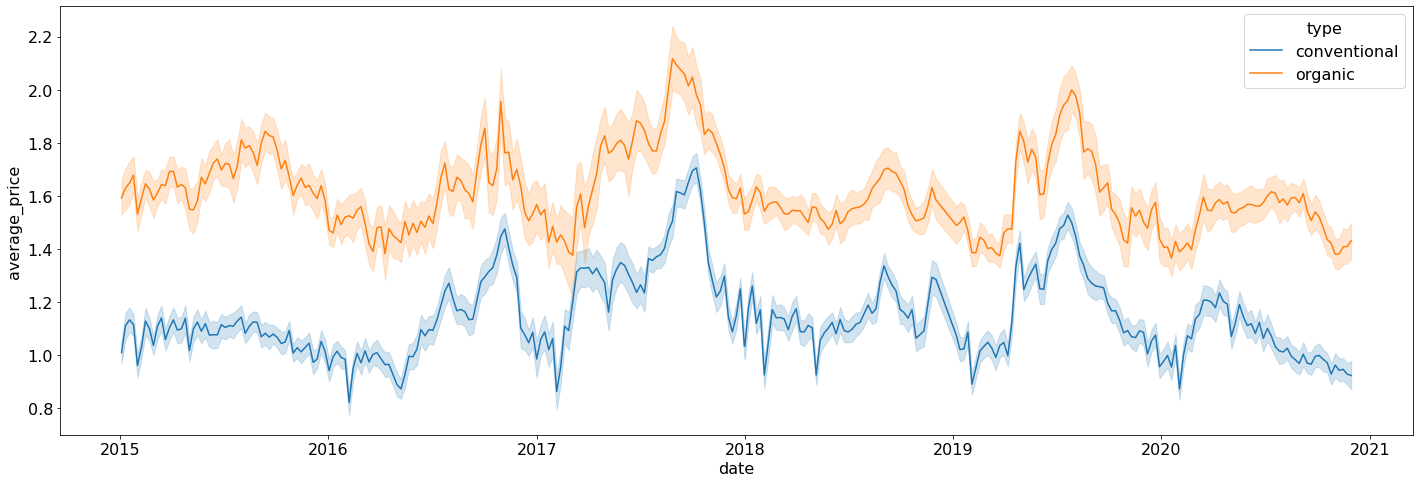

In [ ]:
fig = plt.figure(figsize=(20, 7))

sub1 = plt.subplot(1, 1, 1)
sub1 = sns.lineplot(x="date", y="average_price", hue="type", data=data_avocado)

fig.tight_layout()
plt.show()

nhận xét:

    vào cùng thời điểm thì loại bơ organic luôn có trung bình giá cao hơn loại bơ conventional
    trung bình giá bơ gần đây có xu hướng giãm mạnh
    từ năm 2017 đến 2018 trung bình giá bơ là cao nhất
    trung bình giá bơ vào thời điểm đầu năm bắt đầu tăng dần, đến tháng 7,8,9,10 đạt đỉnh thì sẽ bắt đầu giãm vào cuối năm.

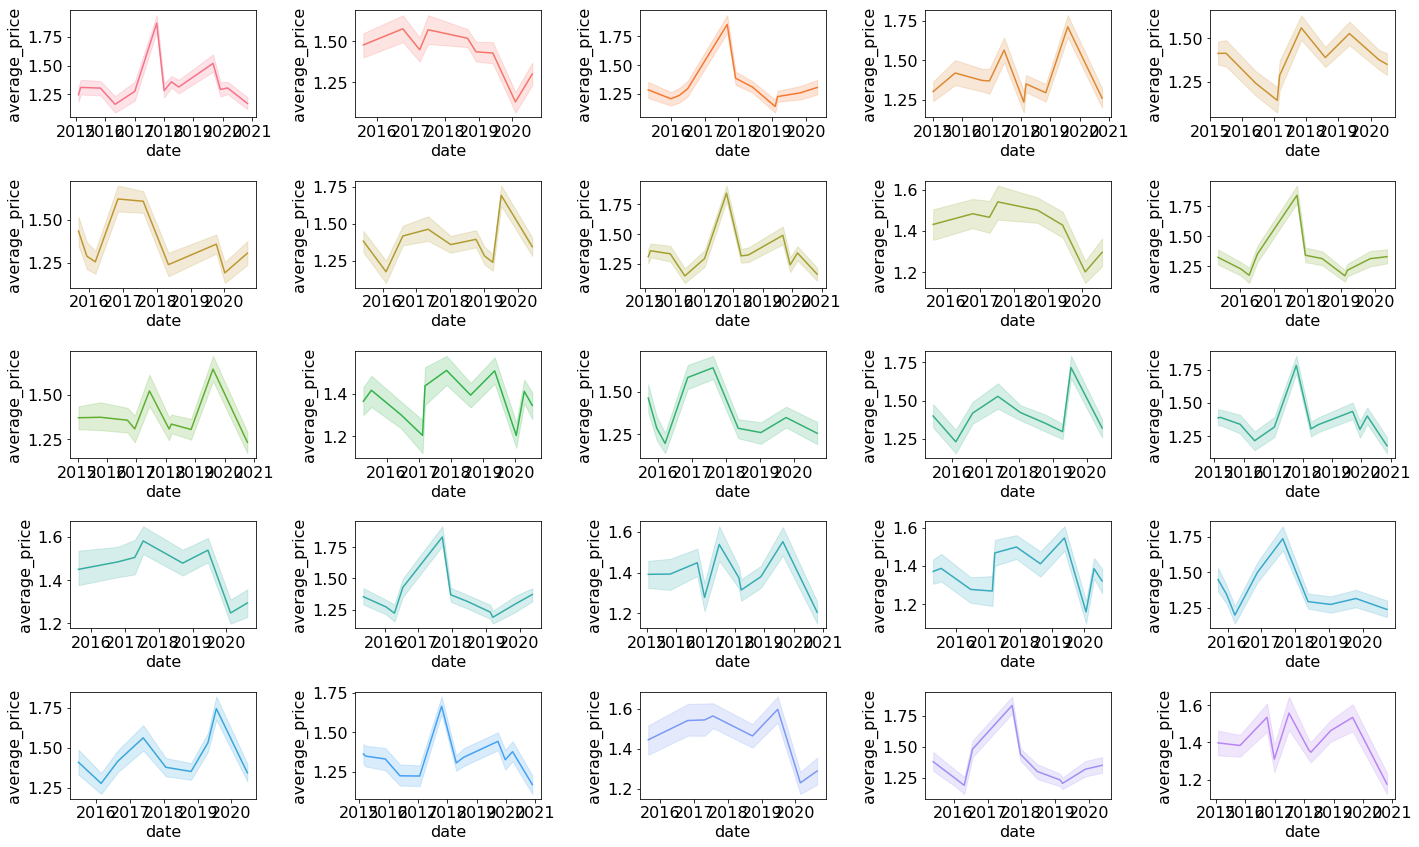

In [ ]:
fig = plt.figure(figsize=(20, 12))

for i in range(1, 26):
  sub1 = plt.subplot(5, 5, i)
  sub1 = sns.lineplot(data=data_avocado.query('day == {}'.format(i)), x="date", y="average_price", hue="day", )
  sub1.get_legend().remove()

fig.tight_layout()
plt.show()

- số phía dưới date chồng chéo lên nhau!!!
- mỗi biểu đồ nhỏ này là gì? ko có tên biểu đồ

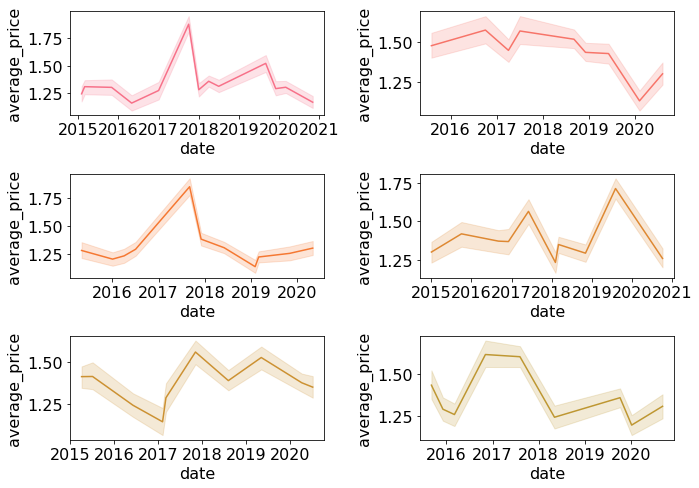

In [ ]:
fig = plt.figure(figsize=(10, 7))

for i in range(1, 7):  # từ ngày 26 đến 31
  sub1 = plt.subplot(3, 2, i)
  sub1 = sns.lineplot(x="date", y="average_price", hue="day", data=data_avocado.query('day == {}'.format(i)))
  sub1.get_legend().remove()

fig.tight_layout()
plt.show()

nhận xét:

    không có ngày nào trong tháng là đặc biệt ảnh hưởng đến giá cả
    như là không có ngày nào kiến giá cả luôn cao hay luôn thấp

# 17) xem xét sự thay đổi của biến 

# type, geography, day, month, year với y="total_volume"

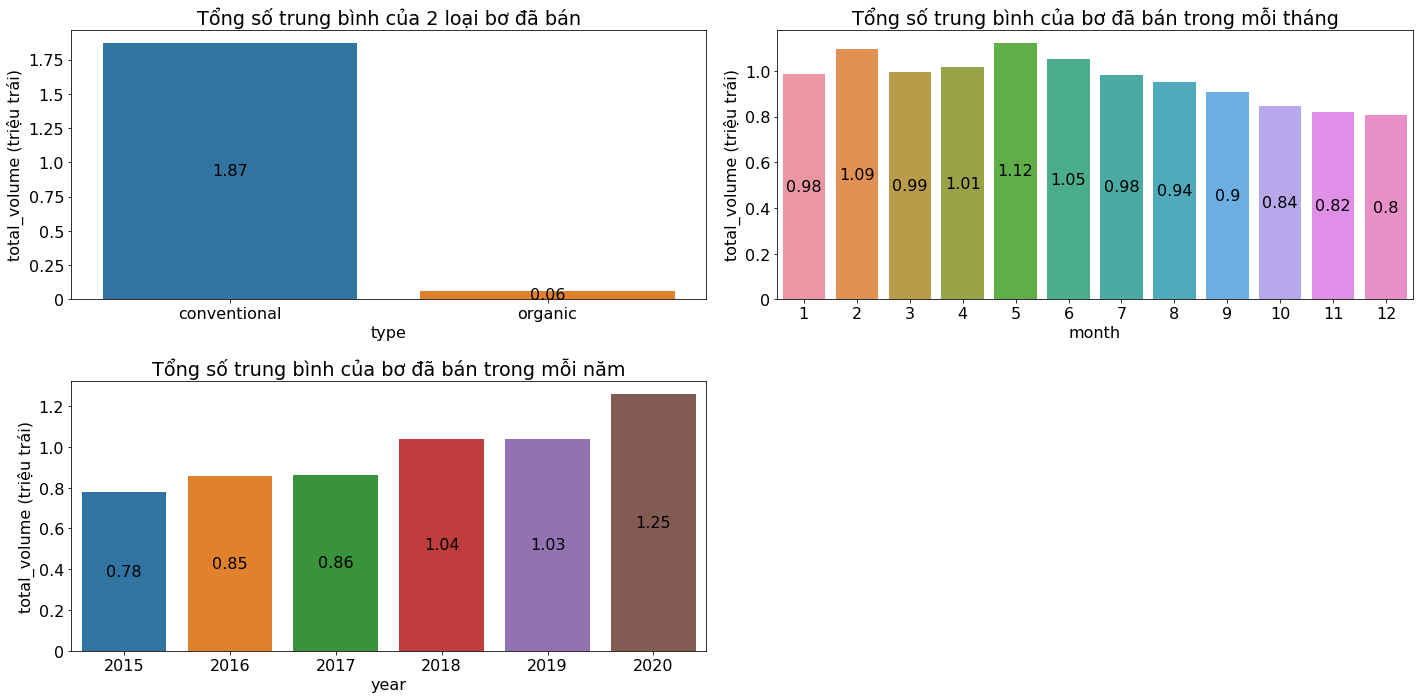

In [ ]:
fig = plt.figure(figsize=(20, 10))

sub1 = plt.subplot(2, 2, 1)
sub1 = sns.barplot(x='type', y="total_volume", data=data_avocado, ci = None)
sub1.set_yticks([0,250000,500000,750000,1000000,1250000, 1500000, 1750000], [0, 0.25, 0.50, 0.75, 1.00, 1.25, 1.50, 1.75])
sub1.set_ylabel("total_volume (triệu trái)")
sub1.set_title("Tổng số trung bình của 2 loại bơ đã bán")
#sub1.legend(title='Số lượng bơ đã bán (triệu trái)', loc='upper right');
sub1.bar_label(sub1.containers[0], labels = [1.87, 0.06], label_type='center')

sub2 = plt.subplot(2, 2, 2)
sub2 = sns.barplot(x='month', y="total_volume", data=data_avocado, ci = None)
sub2.set_yticks([0,200000,400000,600000,800000,1000000], [0, 0.2, 0.4, 0.6, 0.8, 1.0])
sub2.set_title("Tổng số trung bình của bơ đã bán trong mỗi tháng")
sub2.set_ylabel("total_volume (triệu trái)")
plt.bar_label(sub2.containers[0], labels = [0.98, 1.09, 0.99, 1.01, 1.12, 1.05, 0.98, 0.94, 0.9, 0.84, 0.82, 0.8], label_type='center')

sub3 = plt.subplot(2, 2, 3)
sub3 = sns.barplot(x='year', y="total_volume", data=data_avocado, ci = None)
sub3.set_yticks([0,200000,400000,600000,800000,1000000,1200000], [0, 0.2, 0.4, 0.6, 0.8, 1.0, 1.2])
sub3.set_title("Tổng số trung bình của bơ đã bán trong mỗi năm")
sub3.set_ylabel("total_volume (triệu trái)")
plt.bar_label(sub3.containers[0], labels = [0.78, 0.85, 0.86, 1.04, 1.03, 1.25], label_type='center')

fig.tight_layout()
plt.show()

Nhận xét  

  Tổng số trung bình của 2 loại bơ:

    bơ "conventional" gấp ~31.17 lần bơ "organic"

  Tổng số trung bình của bơ đã bán trong mỗi tháng

    từ tháng 1 đến tháng 2 tăng 

    từ tháng 2 đến tháng 3 giảm 

    từ tháng 3 đến tháng 5 tăng với số lượng tăng hơn tháng 2

    từ tháng 5 đến tháng 12 giảm dần

  Tổng số trung bình của bơ đã bán trong mỗi năm

    từ năm 2015 đến 2018 tăng(năm 2016 và 2017 tăng nhẹ)

    năm 2019 giảm nhẹ so với 2018

    năm 2020 tăng mạnh

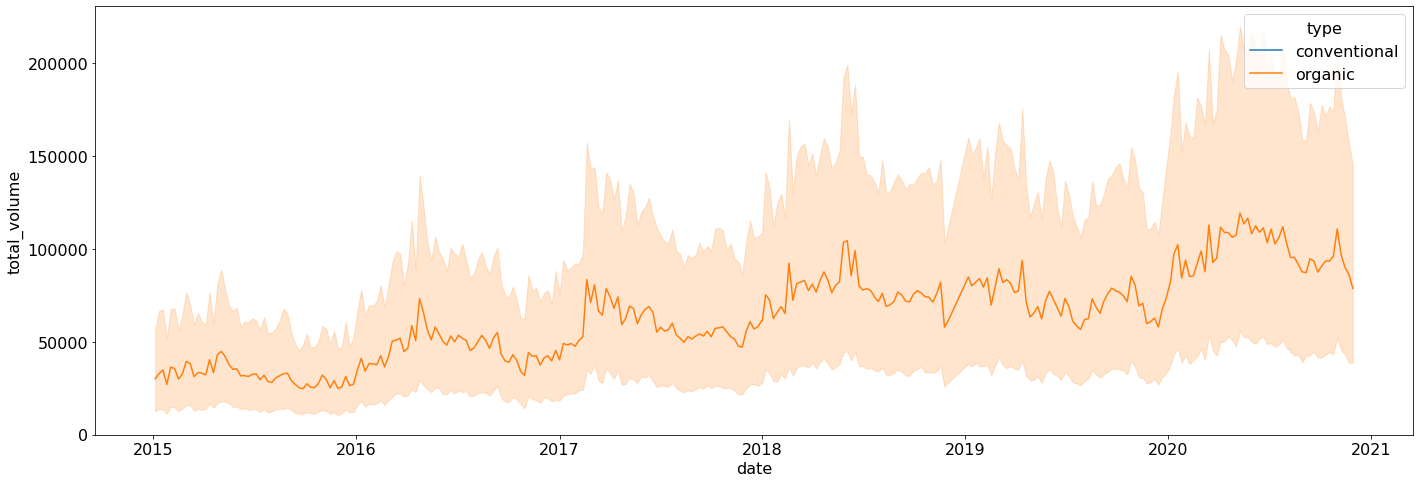

In [ ]:
fig = plt.figure(figsize=(20, 7))

sub1 = plt.subplot(1, 1, 1)
sub1 = sns.lineplot(x="date", y="total_volume", hue="type", data=data_avocado.query('type == "organic"'))

fig.tight_layout()
plt.show()

- Ở type là organic nhưng ở ghi chú lại có cả 2???

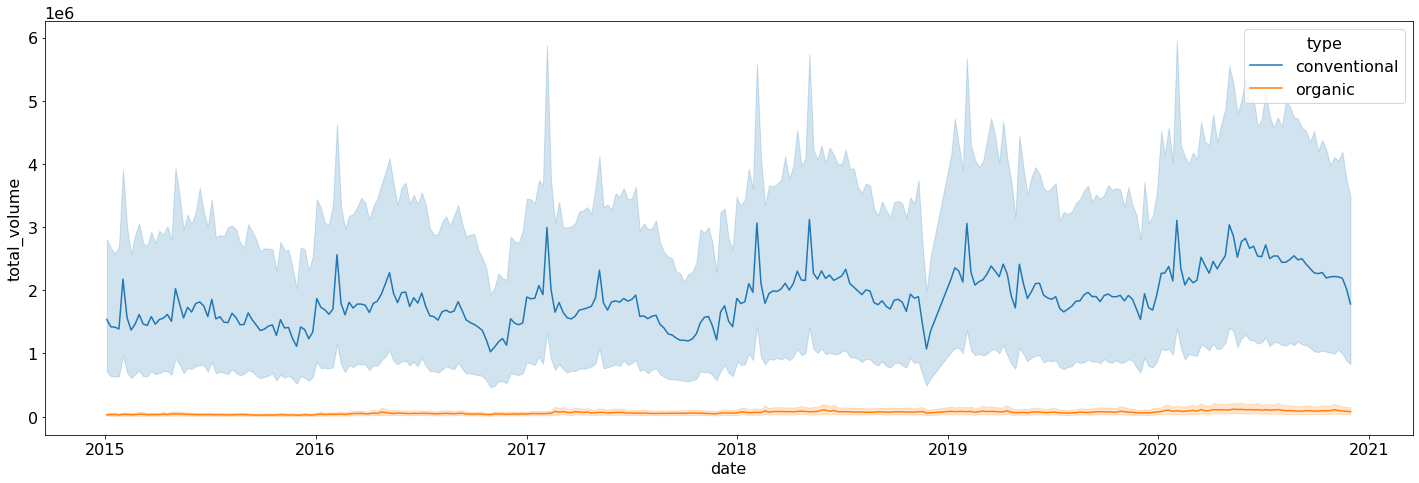

In [ ]:
fig = plt.figure(figsize=(20, 7))

sub1 = plt.subplot(1, 1, 1)
sub1 = sns.lineplot(x="date", y="total_volume", hue="type", data=data_avocado)

fig.tight_layout()
plt.show()

nhận xét:

    total_volume của cả 2 loại bơ đều có quy luật tuần hoàn
    nhưng total_volume của bơ organic có xu hướng tăng dần

# 18) xem xét sự thay đổi của biến 

# type, geography, day, month, year với y="total_bags"

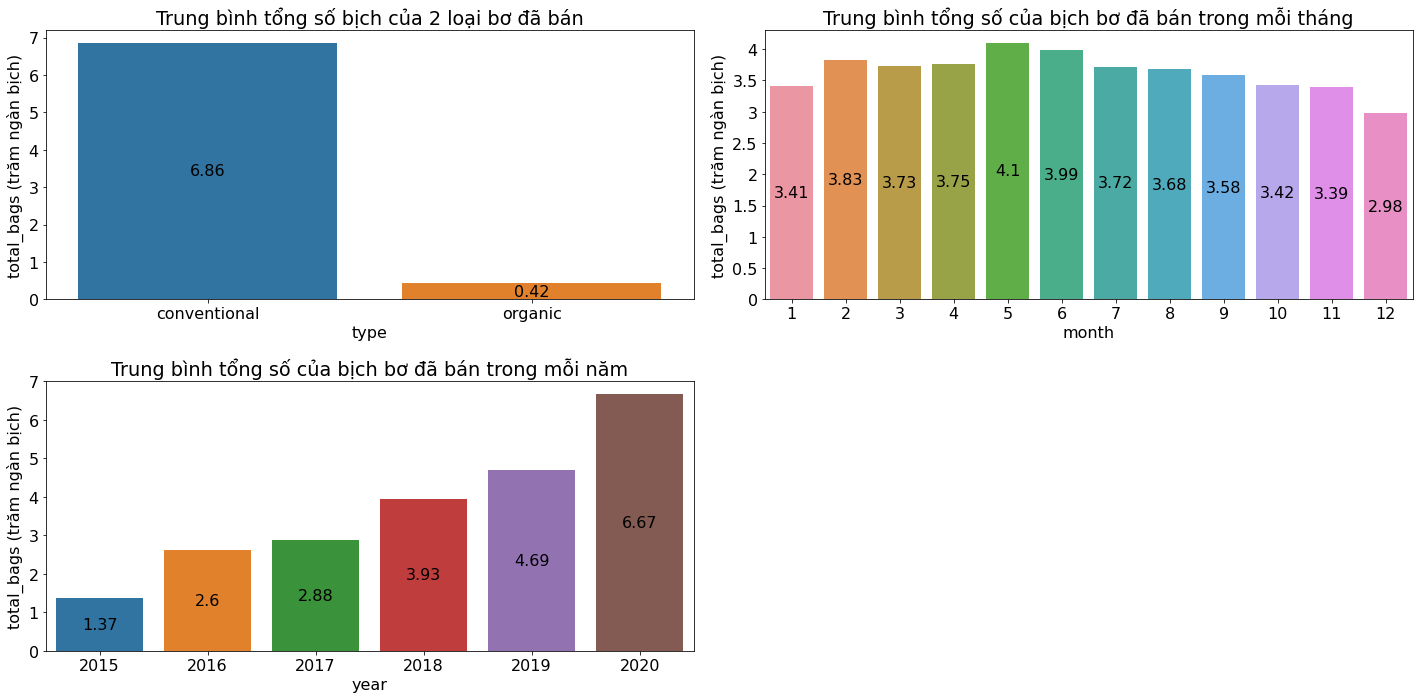

In [ ]:
fig = plt.figure(figsize=(20, 10))

sub1 = plt.subplot(2, 2, 1)
sub1 = sns.barplot(x='type', y="total_bags", data=data_avocado, ci = None)
sub1.set_yticks([0,100000,200000,300000,400000,500000, 600000, 700000], [0, 1, 2, 3, 4, 5, 6, 7])
sub1.set_ylabel("total_bags (trăm ngàn bịch)")
sub1.set_title("Trung bình tổng số bịch của 2 loại bơ đã bán")
plt.bar_label(sub1.containers[0], labels = [6.86, 0.42], label_type='center')

sub2 = plt.subplot(2, 2, 2)
sub2 = sns.barplot(x='month', y="total_bags", data=data_avocado, ci = None)
sub2.set_yticks([0,50000,100000,150000,200000,250000, 300000, 350000, 400000], [0, 0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4])
sub2.set_title("Trung bình tổng số của bịch bơ đã bán trong mỗi tháng")
sub2.set_ylabel("total_bags (trăm ngàn bịch)")
plt.bar_label(sub2.containers[0], labels = [3.41, 3.83, 3.73, 3.75, 4.1, 3.99, 3.72, 3.68, 3.58, 3.42, 3.39, 2.98], label_type='center')

sub3 = plt.subplot(2, 2, 3)
sub3 = sns.barplot(x='year', y="total_bags", data=data_avocado, ci = None)
sub3.set_yticks([0,100000,200000,300000,400000,500000, 600000, 700000], [0, 1, 2, 3, 4, 5, 6, 7])
sub3.set_title("Trung bình tổng số của bịch bơ đã bán trong mỗi năm")
sub3.set_ylabel("total_bags (trăm ngàn bịch)")
plt.bar_label(sub3.containers[0], labels = [1.37, 2.6, 2.88, 3.93, 4.69, 6.67], label_type='center')

fig.tight_layout()
plt.show()

Nhận xét  

  Trung bình tổng số bịch của 2 loại bơ đã bán:

    bơ "conventional" gấp ~16.33 lần bơ "organic"

  Trung bình tổng số của bịch bơ đã bán trong mỗi tháng

    từ tháng 1 đến tháng 2 tăng 

    từ tháng 2 đến tháng 3 giảm 

    từ tháng 3 đến tháng 5 tăng với số lượng tăng hơn tháng 2

    từ tháng 5 đến tháng 12 giảm dần

 Trung bình tổng số của bịch bơ đã bán trong mỗi năm

    từ năm 2015 đến 2019 tăng

    năm 2020 tăng mạnh

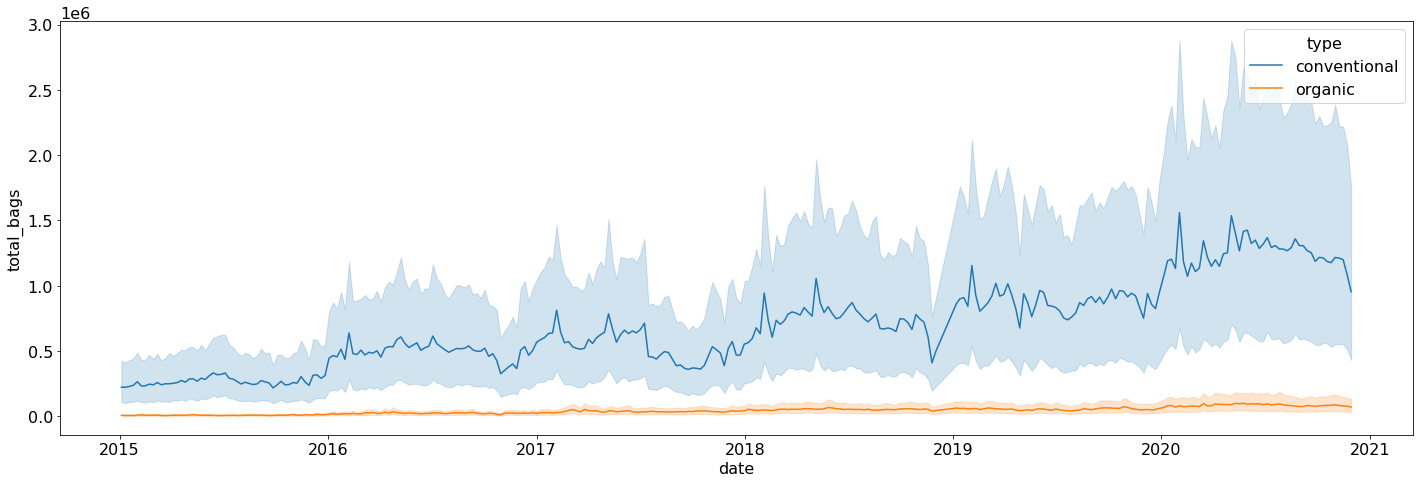

In [ ]:
fig = plt.figure(figsize=(20, 7))

sub1 = plt.subplot(1, 1, 1)
sub1 = sns.lineplot(x="date", y="total_bags", hue="type", data=data_avocado)

fig.tight_layout()
plt.show()

# 19) xem xét loại bơ qua các năm

In [ ]:
data_avocado.groupby(['year', 'type']).mean()

average_price  total_volume           4046           4225  \
year type                                                                      
2015 conventional       1.077963  1.530128e+06  599719.474566  613450.264387   
     organic            1.673324  3.165993e+04    9062.236110   13710.614079   
2016 conventional       1.105595  1.670317e+06  536580.093533  579296.707443   
     organic            1.571684  4.652424e+04    6554.839623   16404.249822   
2017 conventional       1.294888  1.665327e+06  570801.128225  524296.098333   
     organic            1.735521  5.879018e+04    6435.420469   15454.295839   
2018 conventional       1.141092  2.004880e+06  643231.268428  590600.315635   
     organic            1.568946  7.695845e+04    7239.046054   16086.453840   
2019 conventional       1.187179  2.001003e+06  565990.278999  509628.327215   
     organic            1.615830  7.262982e+04    6549.774658   10894.102746   
2020 conventional       1.051420  2.419877e+06  679666.394240  454463.368522   
     organic            1.513098  9.894945e+04    5933.936875    8321.866335   

                           4770    total_bags     small_bags     large_bags  \
year type                                                                     
2015 conventional  50540.495110  2.664177e+05  220615.584601   43863.678276   
     organic         304.483178  8.582592e+03    5412.947528    3169.644418   
2016 conventional  56540.788946  4.978993e+05  379069.014875  111694.138868   
     organic         396.477796  2.316868e+04   14981.640260    8187.037080   
2017 conventional  31727.793463  5.385019e+05  400361.766335  129757.346080   
     organic         144.252759  3.674692e+04   26964.038329    9780.949528   
2018 conventional  37318.461538  7.337295e+05  526018.508613  195894.259191   
     organic          78.563930  5.264378e+04   42525.264339   10112.712041   
2019 conventional  43051.641026  8.823301e+05  541608.683775  317068.794772   
     organic         226.689996  5.495587e+04   44927.265167   10024.663180   
2020 conventional  36609.577010  1.249028e+06  776166.380046  431103.885096   
     organic         251.171474  8.444150e+04   54197.899487   30077.905617   

                    xlarge_bags  
year type                        
2015 conventional   1938.435997  
     organic           0.000000  
2016 conventional   7136.141325  
     organic           0.000000  
2017 conventional   8382.829633  
     organic           1.927948  
2018 conventional  11816.718280  
     organic           5.807555  
2019 conventional  23652.638925  
     organic           3.942920  
2020 conventional  41757.543337  
     organic         165.696902

In [ ]:
import plotly.graph_objects as go

size = data_avocado.average_price
fig = go.Figure(data=[go.Scatter(
    x=data_avocado.type,
    y=data_avocado.year,
    mode='markers',
    marker=dict(
        size=size,
        sizemode='area',
        sizeref=2.*max(size)/(40.**2),
        sizemin=4
    )
)])

fig.show()

nhận xét:

    trung bình giá bơ loại organic luôn cao hơn giá bơ loại conventional qua các năm

In [ ]:
import plotly.graph_objects as go

size = data_avocado.total_volume
fig = go.Figure(data=[go.Scatter(
    x=data_avocado.type,
    y=data_avocado.year,
    mode='markers',
    marker=dict(
        size=size,
        sizemode='area',
        sizeref=2.*max(size)/(40.**2),
        sizemin=4
    )
)])

fig.show()

nhận xét:

    dù vào năm nào đi nữa thì tổng số lượng trái bơ được bán ra của loại organic thấp hơn rất nhiều so với loại conventional
    loại bơ conventional đang có xu hướng giãm tổng số lượng bán ra

In [ ]:
import plotly.graph_objects as go

size = data_avocado.total_bags
fig = go.Figure(data=[go.Scatter(
    x=data_avocado.type,
    y=data_avocado.year,
    mode='markers',
    marker=dict(
        size=size,
        sizemode='area',
        sizeref=2.*max(size)/(40.**2),
        sizemin=4
    )
)])

fig.show()

nhận xét:

    số lượng total_bags của loại bơ organic nhỏ hơn rất nhiều so với bơ conventional
    loại bơ conventional đang tăng nhanh số lượng total_bags

    loại bơ conventional có tổng số total_bags tăng, nhưng tổng số trái bơ bán ra lại đang có xu hướng giãm, cần xem xét giá bán thử xem có phải vấn đề giá cả đã làm cho total_volume giãm hay không.
    

# 19_1) giá thấp nhất, trung bình, cao nhất average_price hàng năm của 2 loại bơ

#### Đối với conventional

In [ ]:
data_avocado.query('type == "conventional"').groupby('year').average_price.describe().iloc[:, [1, 3, 7]]

mean   min   max
year                      
2015  1.077963  0.49  1.59
2016  1.105595  0.51  2.20
2017  1.294888  0.46  2.22
2018  1.141092  0.50  1.95
2019  1.187179  0.54  2.02
2020  1.051420  0.59  1.76

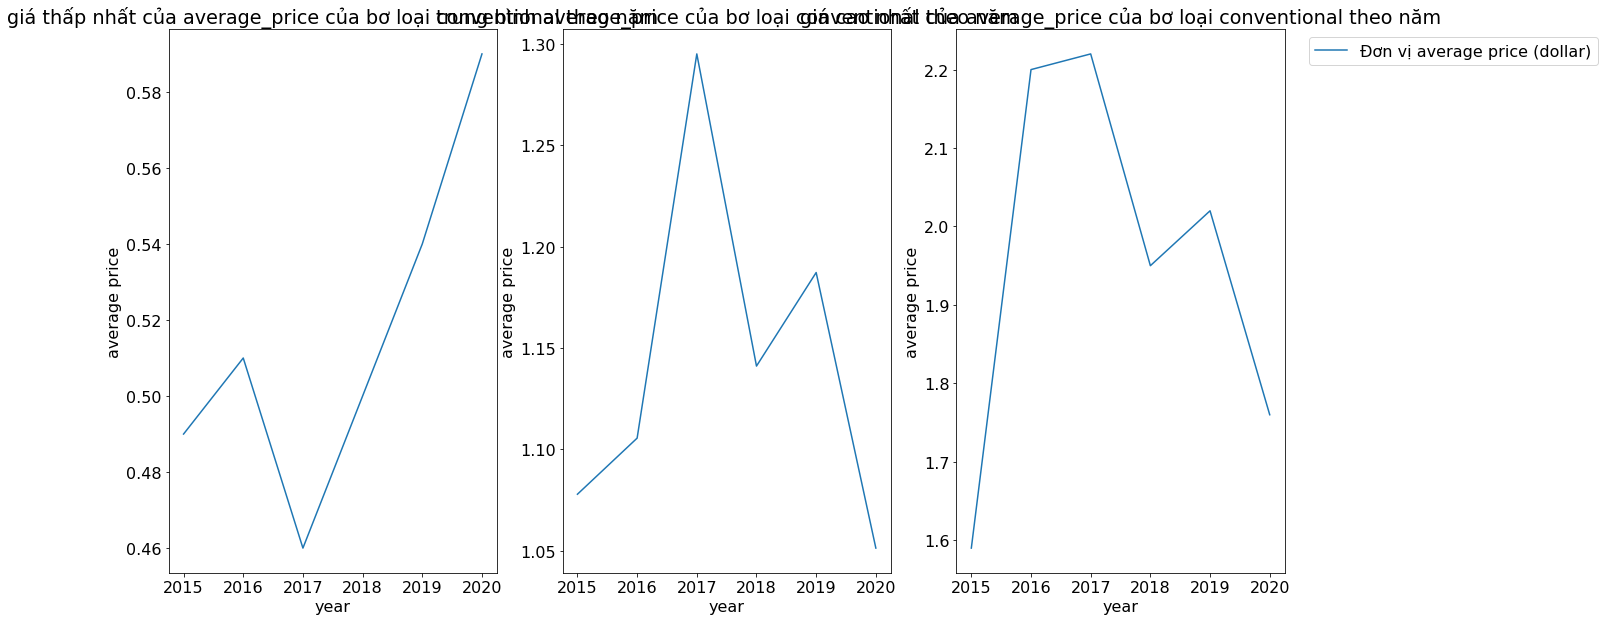

In [ ]:

fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(20,10))


ax1.plot(data_avocado.query('type == "conventional"').groupby('year')['average_price'].min())
ax1.set_xlabel('year')
ax1.set_ylabel('average price')
ax1.set_title('giá thấp nhất của average_price của bơ loại conventional theo năm')
ax1.set_xticks([0,1,2,3,4,5], [2015, 2016, 2017, 2018, 2019, 2020])

ax2.plot(data_avocado.query('type == "conventional"').groupby('year')['average_price'].mean())
ax2.set_xlabel('year')
ax2.set_ylabel('average price')
ax2.set_title('trung bình average_price của bơ loại conventional theo năm')
ax2.set_xticks([0,1,2,3,4,5], [2015, 2016, 2017, 2018, 2019, 2020])

ax3.plot(data_avocado.query('type == "conventional"').groupby('year')['average_price'].max())
ax3.set_xlabel('year')
ax3.set_ylabel('average price')
ax3.set_title('giá cao nhất của average_price của bơ loại conventional theo năm')
ax3.set_xticks([0,1,2,3,4,5], [2015, 2016, 2017, 2018, 2019, 2020])

plt.legend(["Đơn vị average price (dollar)"], bbox_to_anchor=(1.05, 1), loc=2)
plt.show()

- Các chữ trên biểu đồ chồng chéo lên nhau!!!

Nhận xét đối với conventional:

    Ở biểu đồ thể hiện giá thấp nhất mỗi năm là có sự cải thiện từ năm 2017 với 0.46 đã tăng sau 3 năm liền năm 2020 đã lên được hơn 0.58 dollar có độ dao động 0.12

    Ở biểu đồ thể hiện giá trung bình mỗi năm, năm 2017 sẽ là 1 cột mốc vì trước năm 2017 tăng sau năm 2017 giảm độ dao động 0.25. giá đang rớt hơn giá năm 2015

    Ở biểu đồ thể hiện giá cao nhất mỗi năm, năm 2017 cũng sẽ là 1 cột mốc vì trước năm 2017 tăng (năm 2015 - 2016 tăng mạnh nhất) sau năm 2017 giảm độ dao động 0.6. Ch dù đang ở đà rớt giá nhưng vẫn còn cao hơn giá năm 2015

Kết luận:

    Dù đã cải thiện dần ở việc rớt giá nhưng vẫn không khiến cho giá tăng trở lại giá cao nhất như hoặc hơn các năm trước. Vào năm 2019 tăng nhẹ năm sau lại rớt giá

#### Đối với organic

In [ ]:
data_avocado.query('type == "conventional"').groupby('year').average_price.describe().iloc[:, [1, 3, 7]]

mean   min   max
year                      
2015  1.077963  0.49  1.59
2016  1.105595  0.51  2.20
2017  1.294888  0.46  2.22
2018  1.141092  0.50  1.95
2019  1.187179  0.54  2.02
2020  1.051420  0.59  1.76

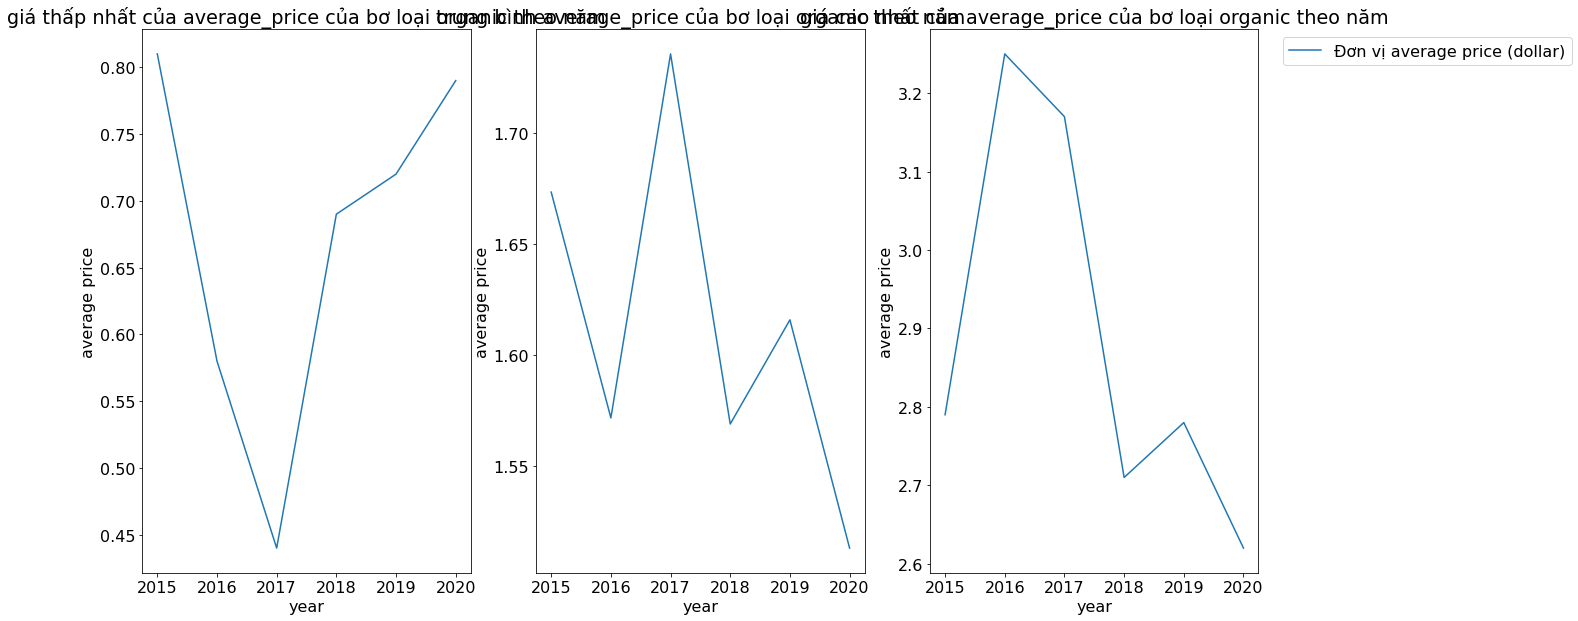

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(20,10))


ax1.plot(data_avocado.query('type == "organic"').groupby('year')['average_price'].min())
ax1.set_xlabel('year')
ax1.set_ylabel('average price')
ax1.set_title('giá thấp nhất của average_price của bơ loại organic theo năm')
ax1.set_xticks([0,1,2,3,4,5], [2015, 2016, 2017, 2018, 2019, 2020])

ax2.plot(data_avocado.query('type == "organic"').groupby('year')['average_price'].mean())
ax2.set_xlabel('year')
ax2.set_ylabel('average price')
ax2.set_title('trung bình average_price của bơ loại organic theo năm')
ax2.set_xticks([0,1,2,3,4,5], [2015, 2016, 2017, 2018, 2019, 2020])

ax3.plot(data_avocado.query('type == "organic"').groupby('year')['average_price'].max())
ax3.set_xlabel('year')
ax3.set_ylabel('average price')
ax3.set_title('giá cao nhất của average_price của bơ loại organic theo năm')
ax3.set_xticks([0,1,2,3,4,5], [2015, 2016, 2017, 2018, 2019, 2020])

plt.legend(["Đơn vị average price (dollar)"], bbox_to_anchor=(1.05, 1), loc=2)
plt.show()

Nhận xét đối với organic:

    Ở biểu đồ thể hiện giá thấp nhất mỗi năm là có sự cải thiện từ năm 2017 với 0.44 đã tăng sau 3 năm liền năm 2020 đã lên được hơn 0.78 dollar có độ dao động 0.35. Nhưng vẫn chưa tăng lại như năm 2015 khoảng 0.81 dollar

    Ở biểu đồ thể hiện giá trung bình mỗi năm, năm 2017 sẽ là 1 cột mốc vì trước năm 2017 tăng sau năm 2017 giảm độ dao động khoảng 0.23 giá đang rớt hơn giá năm 2015 và khoảng cách là 0.16 dollar

    Ở biểu đồ thể hiện giá cao nhất mỗi năm, năm 2016 là 1 cột mốc vì trước năm 2016 tăng (tăng mạnh nhất) sau năm 2016 giảm độ dao động 0.6. Đang ở đà rớt giá thấp hơn giá năm 2015 khoãng 0.2 

Kết luận:

    Dù đã cải thiện dần ở việc rớt giá nhưng vẫn không khiến cho giá tăng trở lại giá cao nhất như hoặc hơn các năm trước. Vào năm 2019 vẫn tăng nhẹ nhưng rớt lại giá vào năm sau

# 19_2) Tổng total_volume của 2 loại bơ đã bán qua các năm

#### Đối với conventional

In [ ]:
con_volume = data_avocado.query('type == "conventional"').groupby("year")["total_volume"].sum()
con_volume = pd.DataFrame(con_volume)
con_volume

total_volume
year              
2015  4.296599e+09
2016  4.690250e+09
2017  4.766166e+09
2018  5.304911e+09
2019  5.618816e+09
2020  6.272322e+09

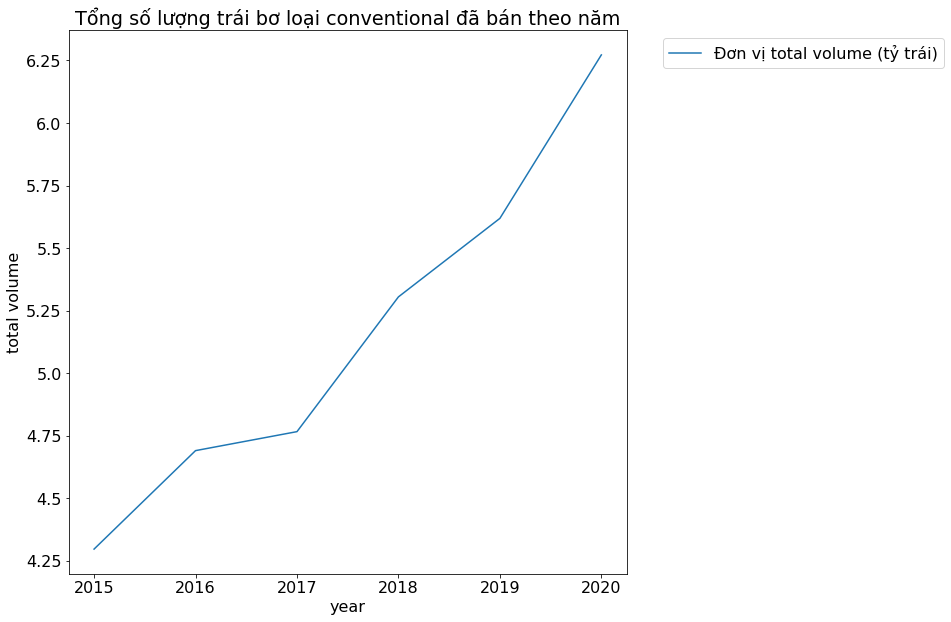

In [ ]:
plt.figure(figsize=(10,10))
plt.plot(con_volume)
plt.title('Tổng số lượng trái bơ loại conventional đã bán theo năm')
plt.xticks([0, 1, 2, 3, 4, 5], [2015, 2016, 2017, 2018, 2019, 2020])
plt.yticks([4250000000, 4500000000, 4750000000, 5000000000, 5250000000, 5500000000, 5750000000,6000000000, 6250000000],[4.25, 4.50, 4.75, 5.00, 5.25, 5.50, 5.75,6.00, 6.25])
#plt.ticklabel_format(useOffset=False, style='plain', axis = 'y')
plt.legend(["Đơn vị total volume (tỷ trái)"], bbox_to_anchor=(1.05, 1), loc=2)
plt.xlabel('year')
plt.ylabel('total volume')
plt.show()

Nhận Xét về conventional:

    Trung bình số lượng bơ tăng hàng năm 

    Từ năm 2017 trở đi số lượng bán ra tăng vọt từ 4.75 đến 6.25 tỷ trái

Kết luận:

    Số lượng bơ bán ra tăng vọt tương đối khớp với thời gian của biểu đồ thể hiện giá trung bình và cao nhất mỗi năm (Từ năm 2015 đến 2017 tăng nhẹ và tương ứng số lượng bán ra vẫn tăng chậm). Suy ra số lượng mua tăng vọt có thể do giá giảm cho dù tại năm 2019 tăng nhẹ

#### Đối với organic

In [ ]:
org_volume = data_avocado.query('type == "organic"').groupby('year')['total_volume'].sum()
org_volume = pd.DataFrame(org_volume)
org_volume

total_volume
year              
2015  8.886943e+07
2016  1.306401e+08
2017  1.681399e+08
2018  2.036320e+08
2019  2.039445e+08
2020  2.564770e+08

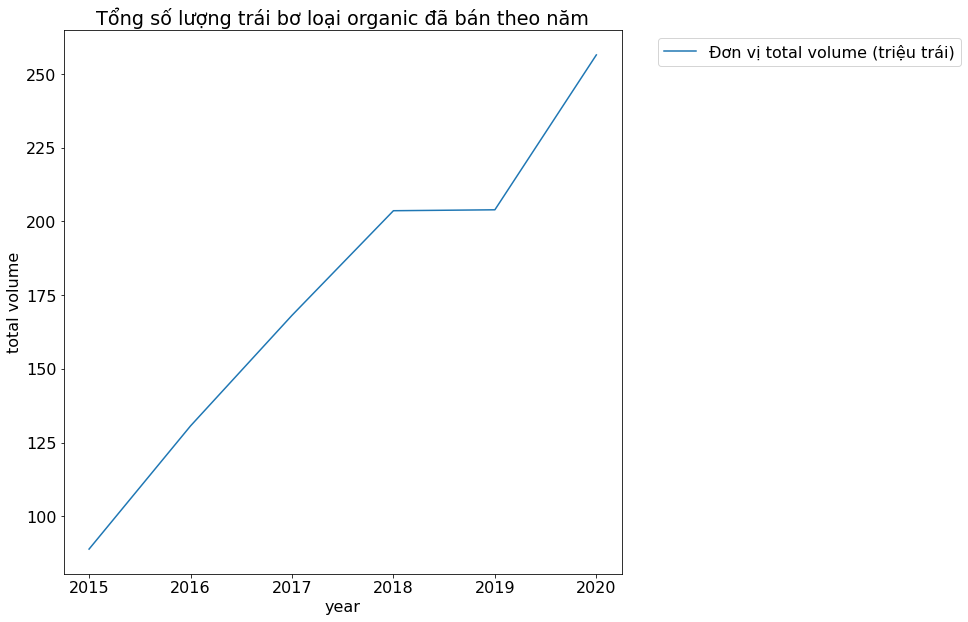

In [ ]:
plt.figure(figsize=(10,10))
plt.plot(org_volume)

plt.title('Tổng số lượng trái bơ loại organic đã bán theo năm')
plt.xticks([0, 1, 2, 3, 4, 5], [2015, 2016, 2017, 2018, 2019, 2020])
plt.yticks([100000000, 125000000, 150000000, 175000000, 200000000, 225000000, 250000000],[100, 125,150, 175, 200, 225, 250])
plt.xlabel('year')
plt.legend(["Đơn vị total volume (triệu trái)"], bbox_to_anchor=(1.05, 1), loc=2)
plt.ylabel('total volume')
plt.show()

Nhận Xét về organic:

    Trung bình số lượng bơ tăng hàng năm 

    Từ năm 2018 đến 2019 số lượng bán ra tăng ít không đáng kể

Kết luận:

    Em tiến hành so sánh giữa 3 đồ thị là: Tổng số lượng trái bơ, trung bình và cao nhất của average_price loại organic đã bán theo năm. Em thấy:

    Trước năm 2017, giá tăng hay giảm là không ảnh hưởng số lượng bơ bán tổng số vẫn tăng.

    từ 2017 đến 2018 giá giảm số lượng bán ra tăng

    từ 2018 đến 2019 giá tăng nhẹ số lượng bán chậm lại.

    



# 19_3) trung bình total_bags của 2 loại bơ qua mỗi năm

#### Đối với conventional

In [ ]:
con_bags = data_avocado.query('type == "conventional"').groupby('year')['total_bags'].mean()
con_bags = pd.DataFrame(con_bags)
con_bags

total_bags
year              
2015  2.664177e+05
2016  4.978993e+05
2017  5.385019e+05
2018  7.337295e+05
2019  8.823301e+05
2020  1.249028e+06

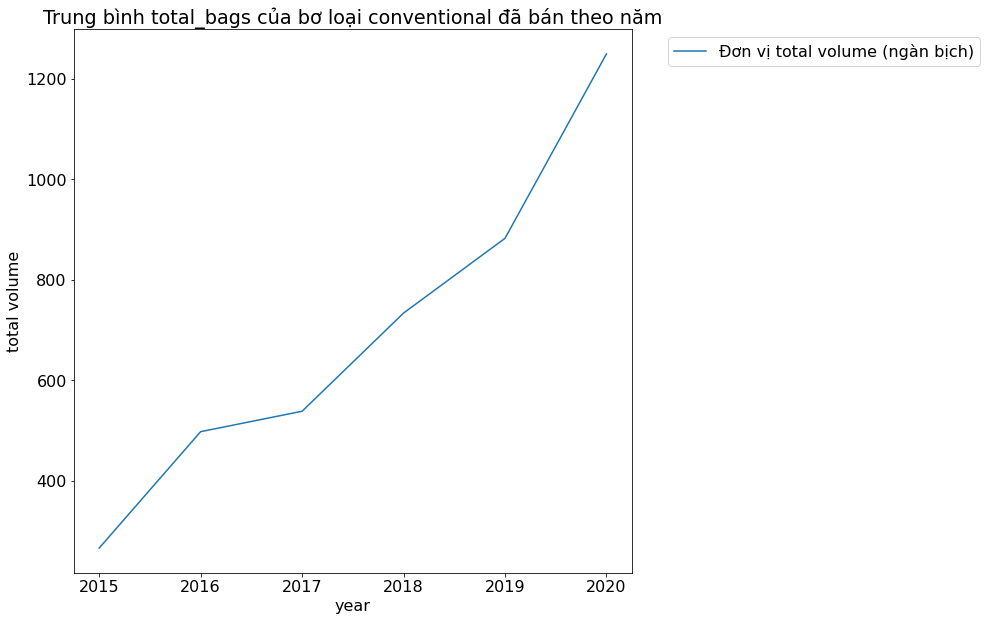

In [ ]:
plt.figure(figsize=(10,10))
plt.plot(con_bags)
plt.title('Trung bình total_bags của bơ loại conventional đã bán theo năm')
plt.xticks([0, 1, 2, 3, 4, 5], [2015, 2016, 2017, 2018, 2019, 2020])
plt.yticks([400000, 600000, 800000, 1000000, 1200000],[400, 600, 800, 1000, 1200])
plt.legend(["Đơn vị total volume (ngàn bịch)"], bbox_to_anchor=(1.05, 1), loc=2)
plt.xlabel('year')
plt.ylabel('total volume')
plt.show()

Nhận Xét về conventional:

    Trung bình số lượng bịch bơ tăng hàng năm 

    Từ năm 2017 trở đi số lượng bán ra tăng vọt từ ~650 đến ~1300 ngàn bịch

Kết luận:

    Sự tăng trưởng về số bịch bơ bán ra có đà tăng trưởng tương đối giống như Trung bình số lượng bơ đã bán 

#### Đối với organic

In [ ]:
org_bags = data_avocado.query('type == "organic"').groupby('year')['total_bags'].mean()
org_bags = pd.DataFrame(org_bags)
org_bags

total_bags
year              
2015   8582.591945
2016  23168.677340
2017  36746.915804
2018  52643.783934
2019  54955.871268
2020  84441.502006

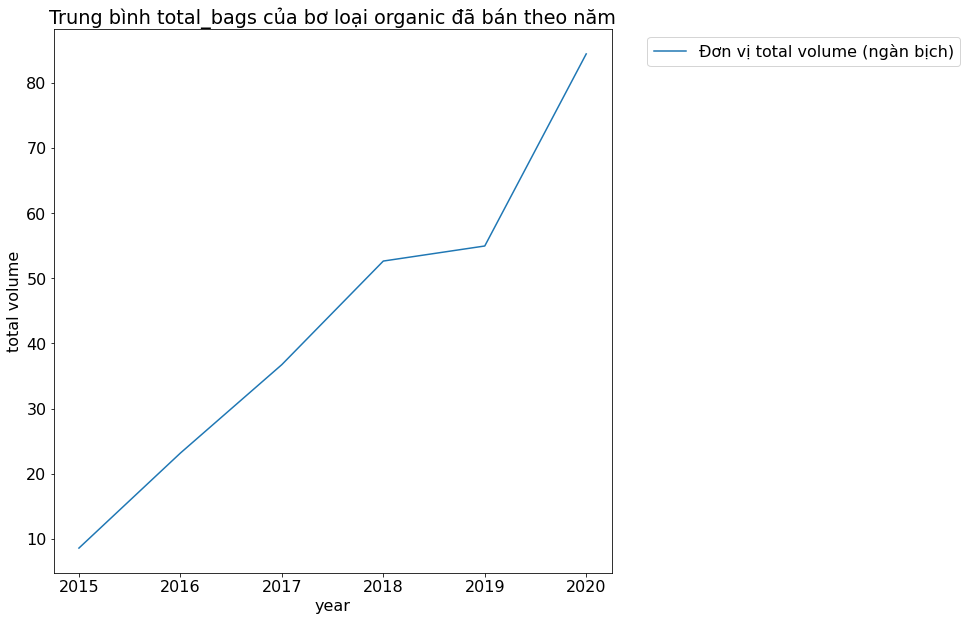

In [ ]:
plt.figure(figsize=(10,10))
plt.plot(org_bags)
plt.title('Trung bình total_bags của bơ loại organic đã bán theo năm')
plt.xticks([0, 1, 2, 3, 4, 5], [2015, 2016, 2017, 2018, 2019, 2020])
plt.yticks([10000, 20000, 30000, 40000, 50000, 60000, 70000, 80000],[10, 20, 30, 40, 50, 60, 70, 80])
plt.legend(["Đơn vị total volume (ngàn bịch)"], bbox_to_anchor=(1.05, 1), loc=2)
plt.xlabel('year')
plt.ylabel('total volume')
plt.show()

Nhận Xét về organic:

    Trung bình số lượng bịch bơ tăng hàng năm 

    Từ năm 2018 đến 2019 số lượng bịch bơ bán ra tăng ít không đáng kể

Kết luận:

    Sự tăng trưởng về số bịch bơ bán ra có đà tăng trưởng tương đối giống như Trung bình số lượng bơ đã bán 


# 20) xem tương quan giữa các biến 

# total_volume, 4046, 4225, 4770, 

# total_bags, small_bags, large_bags, xlarge_bags

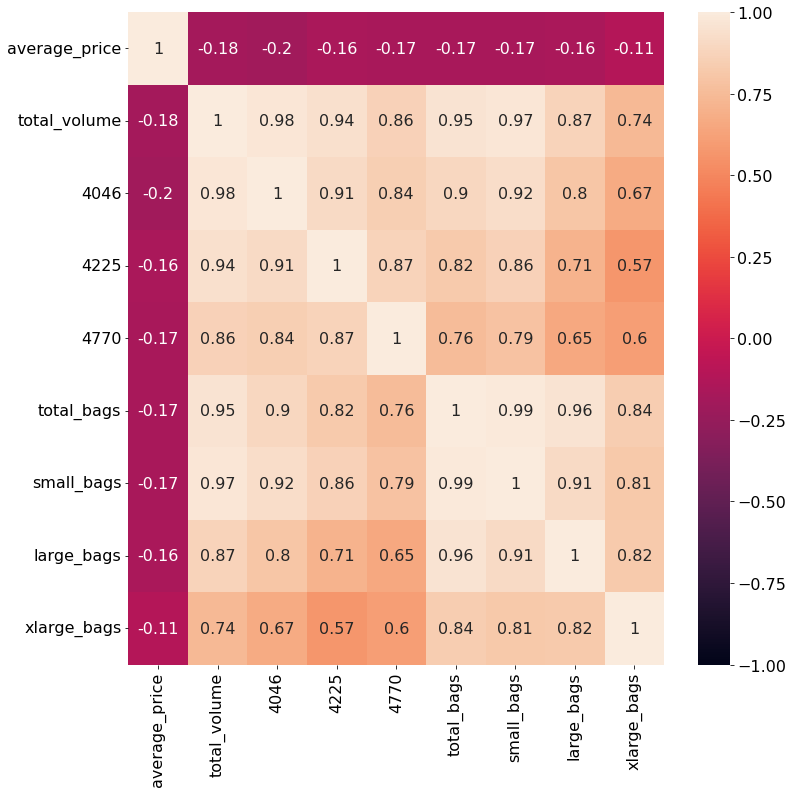

In [ ]:
fig, ax = plt.subplots(figsize=(12, 12))
ax = sns.heatmap(data_avocado.corr(), vmin=-1, vmax=1, annot=True);

nhận xét:

    total_volume có tương quan cao với 4046, 4225, 4770 là lẽ tự nhiên
    vì 'total_volume' = '4046' + '4225' + '4770' + (bơ không có mã) và (bơ có mã khác)
    nhưng ở đây ta nhận được điều đặc biệt là ta quan sát thầy
    total_volume còn tương quan cao với total_bags, small_bags, large_bags, xlarge_bags

    giữa 4046, 4225, 4770 tương quan cao với nhau
    và giữa các small_bags, large_bags, xlarge_bags tương quan cao với nhau

# 21) xem quan hệ giữa các biến 

# total_volume, 4046, 4225, 4770,

# total_bags, small_bags, large_bags, xlarge_bags

<Figure size 1440x720 with 0 Axes>

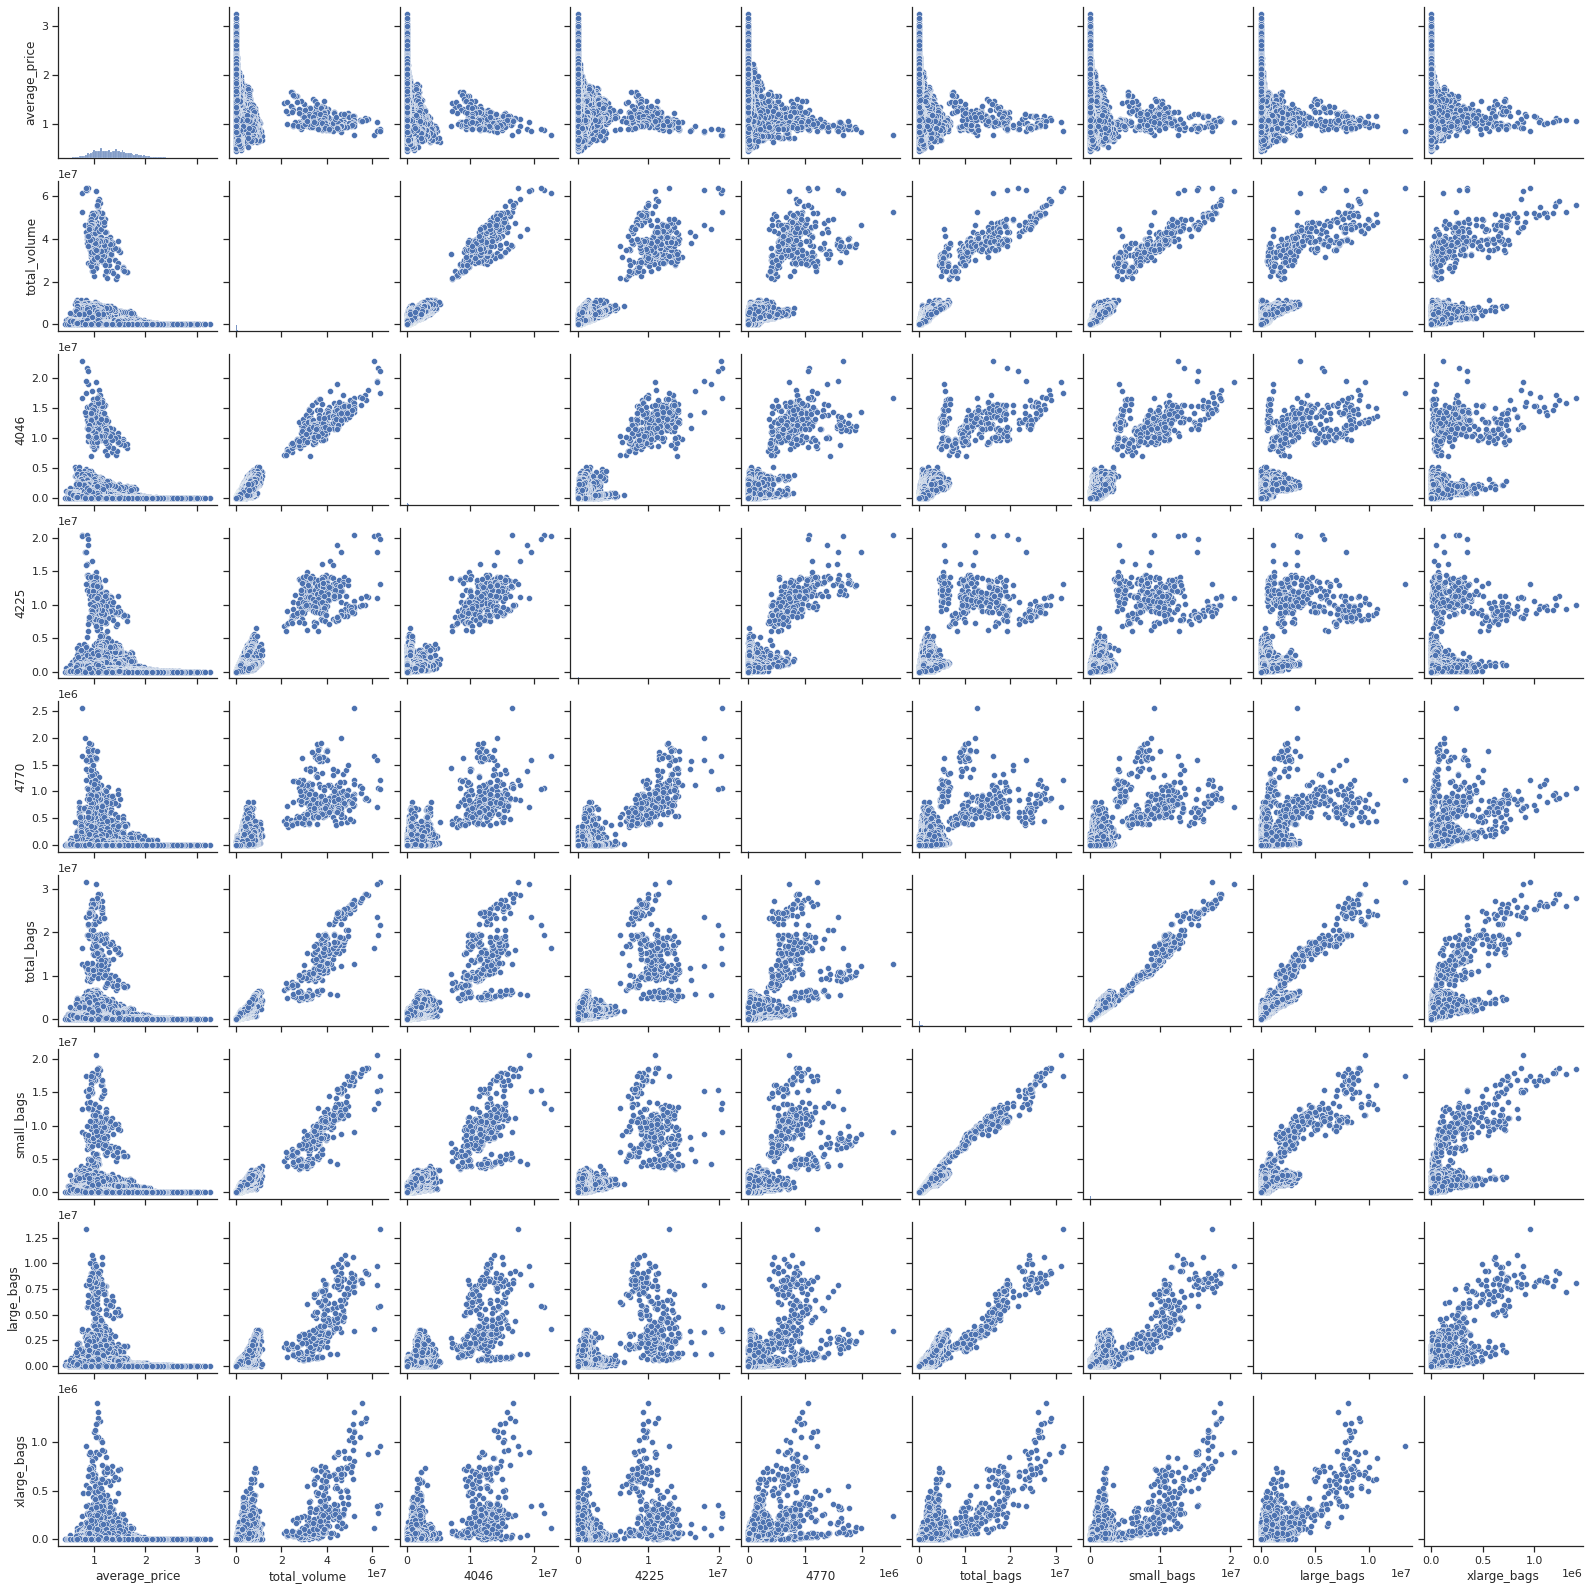

In [ ]:
fig = plt.figure(figsize=(20, 10))
sns.set(style="ticks", color_codes=True)
sns.pairplot(data_avocado)

plt.show()

<Figure size 1440x720 with 0 Axes>

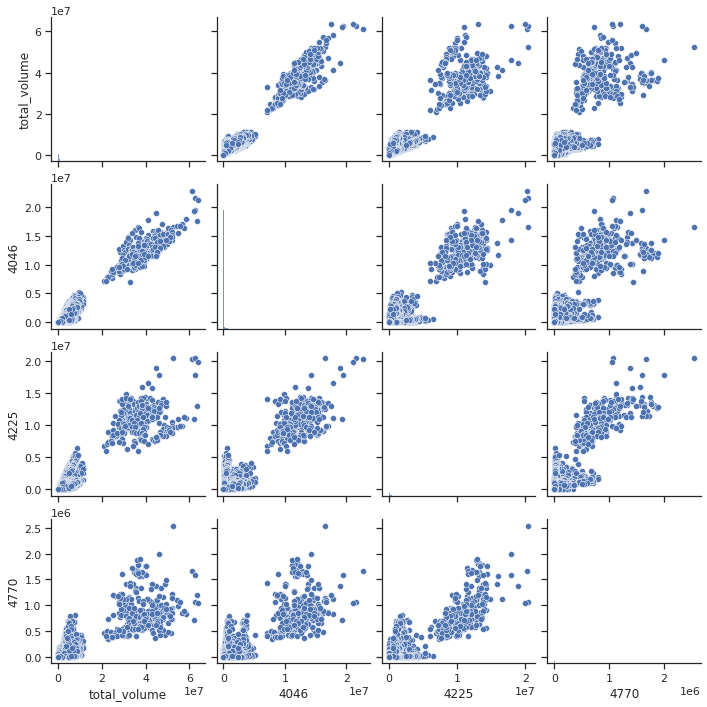

In [ ]:
fig = plt.figure(figsize=(20, 10))
sns.set(style="ticks", color_codes=True)
sns.pairplot(data_avocado[['total_volume', '4046', '4225', '4770']])

plt.show()

<Figure size 1440x720 with 0 Axes>

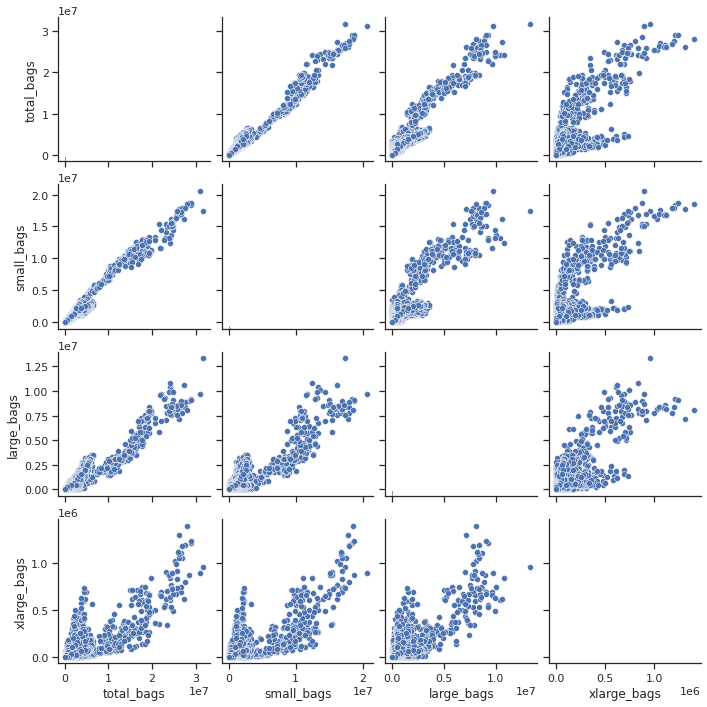

In [ ]:
fig = plt.figure(figsize=(20, 10))
sns.set(style="ticks", color_codes=True)
sns.pairplot(data_avocado[['total_bags', 'small_bags', 'large_bags', 'xlarge_bags']])

plt.show()

nhận xét:

    total_volume có mỗi quan hệ với 4046, 4225, 4770, total_bags, small_bags, small_bags, xlarge_bags

    giữa 4046, 4225, 4770 có tuyến tính với nhau
    và giữa các small_bags, small_bags, xlarge_bags có tuyến tính với nhau

# 22) Top 10 tổng số trái bơ đã bán của từng loại bơ theo thành thị




Đối với conventional

In [ ]:
con_city = data_avocado.query('type == "conventional"').groupby('geography').sum().query('geography != ["Total U.S.", "Northeast", "Midsouth", "South Central", "Southeast", "West", "Plains", "California", "Great Lakes"]')
con_city_top = pd.DataFrame(con_city['total_volume'].sort_values(ascending=False).head(10)).reset_index() 
con_city_top 

geography  total_volume
0           Los Angeles  9.286755e+08
1              New York  5.055508e+08
2      Dallas/Ft. Worth  4.276403e+08
3               Houston  4.127249e+08
4        Phoenix/Tucson  3.773199e+08
5   West Tex/New Mexico  2.747413e+08
6                Denver  2.659763e+08
7  Baltimore/Washington  2.659682e+08
8         San Francisco  2.637035e+08
9               Chicago  2.442852e+08

In [ ]:
ls = list()

for i in con_city_top.geography.unique():
  ls.append(i)

ls

['Los Angeles',
 'New York',
 'Dallas/Ft. Worth',
 'Houston',
 'Phoenix/Tucson',
 'West Tex/New Mexico',
 'Denver',
 'Baltimore/Washington',
 'San Francisco',
 'Chicago']

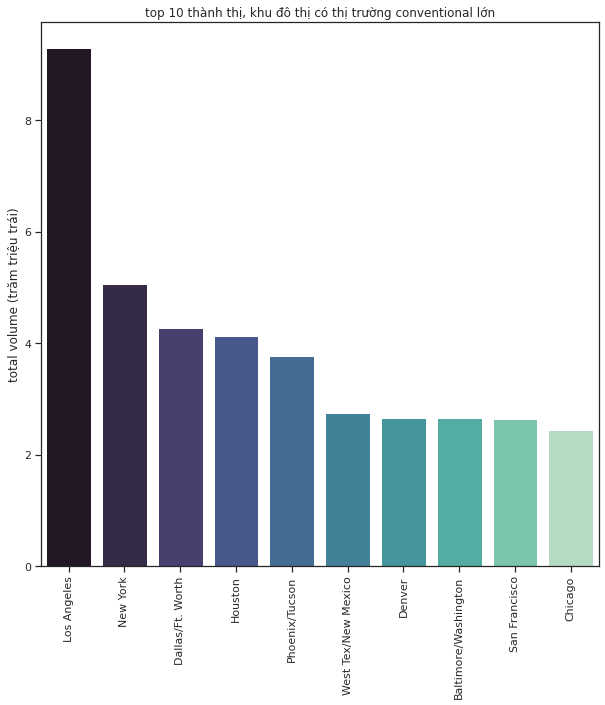

In [ ]:
plt.figure(figsize=(10,10))
sns.barplot(x=ls, 
            y = 'total_volume' ,palette=("mako"), data = con_city_top)
plt.title('top 10 thành thị, khu đô thị có thị trường conventional lớn')

plt.yticks([0, 200000000, 400000000, 600000000, 800000000],[0, 2, 4, 6,8])
plt.ylabel('total volume (trăm triệu trái)')
plt.xticks(rotation = 90)
plt.show()

Trong to 10 thị trường thành thị của conventional bơ

    Los Angeles có thị phần cực kì lớn và có số lượng bơ đã bán gần bằng top 2 và 3 cộng lại 

    Los Angeles có thị phần gần 4 lần thị phần của Chicago (hạng 10)

  Nếu xếp theo vùng:

    hạng nhất: California (Los Angeles + San Francisco) ~ 11.92379e+08

    hạng hai: West (Phoenix/Tucson + West Tex/New Mexico + Denver) ~ 9.180375+e08

    hạng ba: South Central (Dallas/Ft. Worth + Houston) ~ 8.403652+e08

    hạng bốn: Northeast (New York + Baltimore/Washington) ~ 7.71519e+08

    hạng năm: Great Lakes (Chicago) =  2.442852e+08


Kết luận:

    Vùng California là một thị trường lớn và lớn nhất là Los Angeles đã bỏ xa các thị trường khác


    





Đối với organic

In [ ]:
org_city = data_avocado.query('type == "organic"').groupby('geography').sum().query('geography != ["Total U.S.", "Northeast", "Midsouth", "South Central", "Southeast", "West", "Plains", "California", "Great Lakes"]')
org_city_top = pd.DataFrame(org_city['total_volume'].sort_values(ascending=False).head(10)).reset_index() 
org_city_top

geography  total_volume
0           Los Angeles   30675012.77
1              New York   22694466.58
2               Seattle   16906513.80
3               Chicago   13379785.02
4                Denver   11953258.41
5  Baltimore/Washington   10796470.10
6              Portland   10785570.21
7         San Francisco   10513410.08
8      Dallas/Ft. Worth    8563901.31
9               Houston    8118906.95

In [ ]:
ls1 = list()

for i in org_city_top.geography.unique():
  ls1.append(i)

ls1

['Los Angeles',
 'New York',
 'Seattle',
 'Chicago',
 'Denver',
 'Baltimore/Washington',
 'Portland',
 'San Francisco',
 'Dallas/Ft. Worth',
 'Houston']

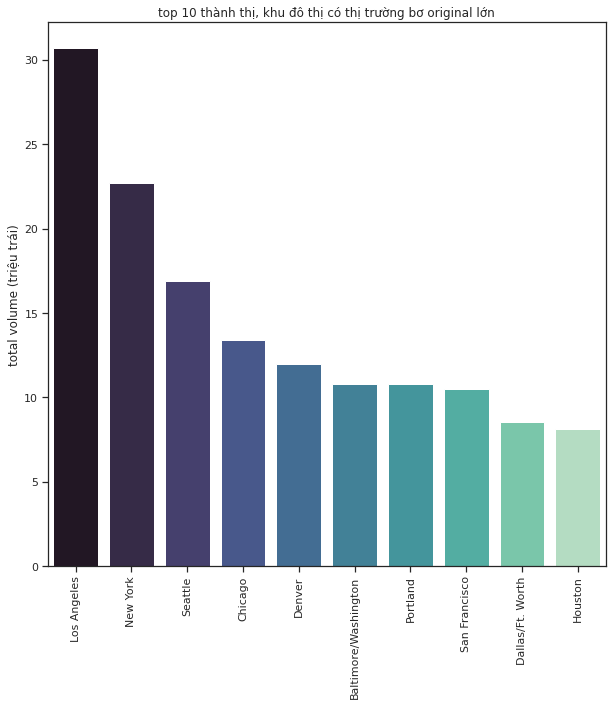

In [ ]:
plt.figure(figsize=(10,10))
sns.barplot(x=ls1, 
            y = 'total_volume' ,palette=("mako"), data = org_city_top)
plt.title('top 10 thành thị, khu đô thị có thị trường bơ original lớn')

plt.yticks([0, 5000000, 10000000, 15000000, 20000000, 25000000, 30000000],[0, 5, 10, 15,20, 25, 30])
plt.ylabel('total volume (triệu trái)')
plt.xticks(rotation = 90)
plt.show()


Trong top 10 thị trường thành thị của organic bơ

    Los Angeles có thị phần lớn và có số lượng bơ đã bán gần bằng top 3 và 4 cộng lại 

    Los Angeles có thị phần ~3.77 lần thị phần của Houston (hạng 10)

  Nếu xếp theo vùng:

    hạng nhất: California (Los Angeles + San Francisco) ~ 41188422.85

    hạng hai: West (Portland + Seattle+ Denver) ~ 39645342.42

    hạng ba: Northeast (New York + Baltimore/Washington) ~ 33,490,936.68

    hạng bốn: South Central (Dallas/Ft. Worth + Houston) ~ 16,682,808.26

    hạng năm: Great Lakes (Chicago) =  13379785.02


Kết luận:

    Vùng California là một thị trường lớn và lớn nhất là Los Angeles của cả bơ organic và convolutional 

    New York cũng là thị trường lớn thứ hai của cả bơ organic và convolutional

# 22) Thị phần bơ bán ra của các vùng ở nước mỹ

In [ ]:
area = data_avocado.groupby('geography').sum().query('geography == ["Northeast", "Midsouth", "South Central", "Southeast", "West", "Plains", "California", "Great Lakes"]').sort_values(by='total_volume', ascending=False)
area.drop(['average_price'], axis=1)

total_volume          4046          4225         4770  \
geography                                                              
West           2.150049e+09  6.599531e+08  4.961468e+08  33569110.92   
South Central  2.075908e+09  9.669360e+08  3.624510e+08  41349174.84   
California     1.991888e+09  6.787687e+08  5.736162e+08  54481106.27   
Northeast      1.541420e+09  9.125790e+07  9.580550e+08  10071956.59   
Southeast      1.381324e+09  6.922186e+08  1.306608e+08   5338432.51   
Great Lakes    1.220448e+09  2.129144e+08  3.981722e+08  94296689.25   
Midsouth       1.097477e+09  2.744370e+08  3.671304e+08  22931039.47   
Plains         6.352576e+08  2.746579e+08  1.583642e+08   4311602.83   

                 total_bags    small_bags    large_bags  xlarge_bags  
geography                                                             
West           9.602930e+08  4.914628e+08  4.599760e+08   8854154.42  
South Central  7.051717e+08  4.891784e+08  2.057789e+08  10214455.08  
California     6.850223e+08  5.265708e+08  1.230078e+08  35443742.03  
Northeast      4.820235e+08  3.854023e+08  9.221025e+07   4411031.01  
Southeast      5.531056e+08  3.377097e+08  2.076824e+08   7713531.48  
Great Lakes    5.141338e+08  3.695672e+08  1.249850e+08  19581638.96  
Midsouth       4.329693e+08  3.412178e+08  8.716037e+07   4591145.66  
Plains         1.979093e+08  1.691300e+08  2.319545e+07   5583772.17

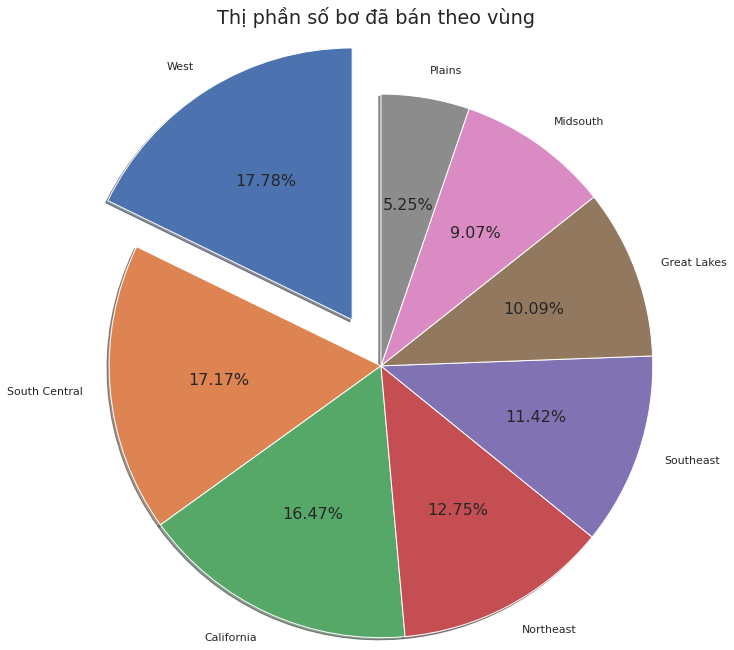

In [ ]:
fig, ax = plt.subplots(figsize =(5, 5))
ax.axis("equal")
plt.rcParams.update({'font.size': 16})
ax.pie(area['total_volume'],
        labels=["West", "South Central", "California", "Northeast", "Southeast", "Great Lakes", "Midsouth", "Plains"], 
        radius=2.5, 
        autopct='%0.2f%%', 
        shadow=True,
        explode=[0.5,0, 0, 0, 0, 0, 0, 0],
        startangle=90);

fig.suptitle("Thị phần số bơ đã bán theo vùng", x=.5, y= 1.5);

Nhận Xét: 

    Thị phần của khu vực West là lớn nhất(là 17.78 %)
    Thứ hai là khu vực South Central là lớn thứ hai (khoảng 0.61 %)
    Thứ ba là California (nhỏ hơn West là 1.31 %)
    Thứ tư là Northeast (nhỏ hơn West là 5.03 %)
    Thứ năm là Southeast (nhỏ hơn West là 6.36 %)
    Thứ sáu là Great Lake (nhỏ hơn West là 7.69 %)
    Thứ bảy là Midsouth (nhỏ hơn West là 8.71 %)
    Nhỏ nhất là Plains (nhỏ hơn West là 12.53 %)

Kết Luận:

    Dù là California là lớn thứ ba nhưng khu vực này chỉ có 1 bang còn khu vực West và South Central là khu vực có nhiều bang mà chỉ kém có hơn ~ 1.31% và 0.7%

    Chúng ta có thể suy ra thực chất khu vực California mới là lớn nhất và cần được củng cố nhất.

    Đối với khu vực West, South Central em chỉ cần tạo những khuyến mãi nhỏ để kích cầu thêm

    Đối với khu vực Northeast, Southeast, Great Lake em có thể tiến hành đầu tư và tìm hiểu thêm khách hàng khu vực mong muốn như: mong muốn bơ sẽ như thế nào, trong dịp nào họ muốn ăn, có muốn thử sản phẩm mới làm từ bơ không, có phải xếp hàng khi mua không ... .

    Đối với khu vực Midsouth, Plains, em cần phải đầu tư nhiều trong quảng cáo để cho nhiều người biết hơn. Khu vực này phải đầu tư nhiều và lâu nếu muốn mở rộng thêm

# 24) tổng số trái bơ đã bán của từng loại bơ theo vùng

Đối với conventional

In [ ]:
con_area = data_avocado.query('type == "conventional"').groupby('geography').sum().query('geography == ["Northeast", "Midsouth", "South Central", "Southeast", "West", "Plains", "California", "Great Lakes"]')
con_area = con_area['total_volume'].sort_values(ascending=False).head(10).reset_index()
con_area

geography  total_volume
0           West  2.069721e+09
1  South Central  2.035244e+09
2     California  1.929805e+09
3      Northeast  1.477863e+09
4      Southeast  1.354010e+09
5    Great Lakes  1.166122e+09
6       Midsouth  1.050452e+09
7         Plains  6.171561e+08

In [ ]:
ls2 = list()

for i in con_area.geography.unique():
  ls2.append(i)

ls2

['West',
 'South Central',
 'California',
 'Northeast',
 'Southeast',
 'Great Lakes',
 'Midsouth',
 'Plains']

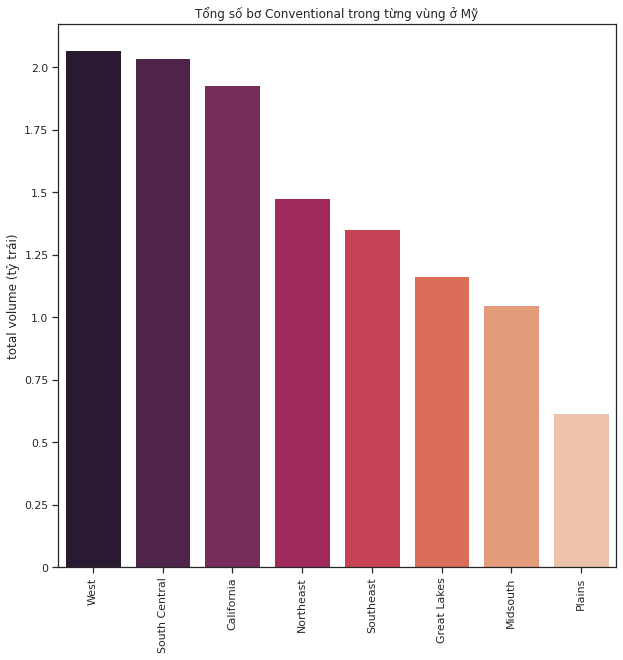

In [ ]:
plt.figure(figsize=(10,10))
sns.barplot(x=ls2 , 
            y = 'total_volume' ,palette=("rocket"), data = con_area)
plt.title('Tổng số bơ Conventional trong từng vùng ở Mỹ')

plt.yticks([0, 250000000, 500000000, 750000000, 1000000000, 1250000000, 1500000000, 1750000000, 2000000000],[0, 0.25, 0.5, 0.75,1.0, 1.25, 1.50, 1.75, 2.00])
plt.ylabel('total volume (tỷ trái)')

plt.xticks(rotation = 90)
plt.show()


Nhận xét đối với bơ conventional:


    3 vùng West, South Central, California là có số lượng bơ bán ra nhiều và nhiều nhất là vùng West (khoảng ~ 2 đến ~ 1.9 tỷ trái)

    4 vùng Northeast, Southeast, Great Lakes, Midsouth là số lượng bán ra trung bình ít (khoảng ~ 1.4 đến ~ 1.0 tỷ trái)

    vùng bán ra ít nhất là Plains khảng ~ 617 triệu trái

Kết luận: 

    Cho dù ở thị phần chung hay chỉ thị phần của cả hai loại bơ thì 3 vùng West, South Central, California là có số lượng bơ bán ra nhiều vượt xa các thị trường còn lại

    Vùng Plain vẫn có tổng số bán ra thấp nhất

Đối với organic

In [ ]:
org_area = data_avocado.query('type == "organic"').groupby('geography').sum().query('geography == ["Northeast", "Midsouth", "South Central", "Southeast", "West", "Plains", "California", "Great Lakes"]')
org_area = org_area['total_volume'].sort_values(ascending=False).head(10).reset_index()
org_area 

geography  total_volume
0           West   80327685.12
1      Northeast   63556756.68
2     California   62083425.82
3    Great Lakes   54326849.54
4       Midsouth   47025233.94
5  South Central   40663697.45
6      Southeast   27313520.24
7         Plains   18101510.67

In [ ]:
ls3 = list()

for i in org_area.geography.unique():
  ls3.append(i)

ls3

['West',
 'Northeast',
 'California',
 'Great Lakes',
 'Midsouth',
 'South Central',
 'Southeast',
 'Plains']

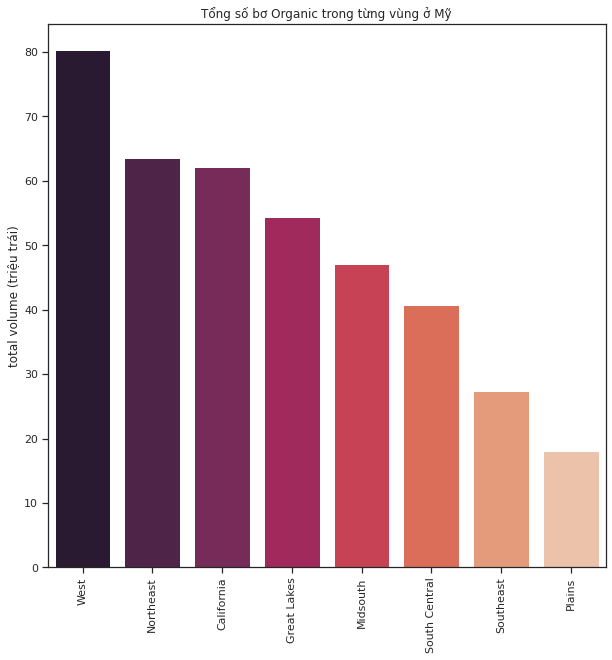

In [ ]:
plt.figure(figsize=(10,10))
sns.barplot(x=ls3 , 
            y = 'total_volume' ,palette=("rocket"), data = org_area)
plt.title('Tổng số bơ Organic trong từng vùng ở Mỹ')

plt.yticks([0, 10000000, 20000000, 30000000, 40000000, 50000000, 60000000, 70000000, 80000000],[0, 10, 20, 30, 40, 50, 60, 70, 80])
plt.ylabel('total volume (triệu trái)')

plt.xticks(rotation = 90)
plt.show()


Nhận xét đối với bơ Organic:

    Vùng West có số lượng bơ organic bán ra là nhiều nhất ~ 80 triệu trái

    2 vùng South Central, California là có số lượng bơ bán ra nhiều thứ hai(khoảng ~ 62 đến ~ 63 triệu trái)

    4 vùng Northeast, Southeast, Great Lakes, Midsouth là số lượng bán ra trung bình ít (khoảng ~ 54 đến ~ 27 triệu trái)

    vùng bán ra ít nhất là Plains khảng ~ 18 triệu trái

Kết luận: 

    Cho dù ở thị phần chung hay chỉ thị phần của cả hai loại bơ thì 3 vùng West, South Central, California là có số lượng bơ bán ra nhiều và nhiều vượt xa các thị trường còn lại là vùng west

    Vùng Plain vẫn có tổng số bán ra thấp nhất

# 25) xem xu hướng tăng trưởng ở mỗi vùng

In [ ]:
area_year = data_avocado.groupby(['year','geography']).sum().query('geography == ["Northeast", "Midsouth", "South Central", "Southeast", "West", "Plains", "California", "Great Lakes"]')
area_year = pd.DataFrame(area_year).reset_index()
area_year = area_year.astype({"geography":'object'})
area_year

year      geography  average_price  total_volume          4046  \
0   2015     California         136.85  3.014074e+08  1.454953e+08   
1   2015    Great Lakes         137.93  1.693880e+08  2.517360e+07   
2   2015       Midsouth         140.54  1.402219e+08  3.086878e+07   
3   2015      Northeast         160.55  2.033790e+08  5.489370e+06   
4   2015         Plains         149.54  8.763879e+07  4.495920e+07   
5   2015  South Central         115.65  2.904546e+08  1.631024e+08   
6   2015      Southeast         147.13  1.600952e+08  1.057968e+08   
7   2015           West         128.73  3.046703e+08  1.310224e+08   
8   2016     California         138.31  3.261884e+08  1.082640e+08   
9   2016    Great Lakes         132.81  1.777400e+08  2.563728e+07   
10  2016       Midsouth         140.49  1.542605e+08  3.316762e+07   
11  2016      Northeast         165.95  2.189311e+08  9.675770e+06   
12  2016         Plains         143.26  9.524163e+07  4.151270e+07   
13  2016  South Central         106.80  3.040987e+08  1.583026e+08   
14  2016      Southeast         133.84  1.981215e+08  9.389859e+07   
15  2016           West         122.81  3.445773e+08  1.184881e+08   
16  2017     California         162.59  3.176445e+08  1.149494e+08   
17  2017    Great Lakes         151.01  1.893539e+08  3.233803e+07   
18  2017       Midsouth         161.18  1.655536e+08  3.542271e+07   
19  2017      Northeast         179.57  2.246473e+08  1.453107e+07   
20  2017         Plains         160.11  1.002800e+08  4.479101e+07   
21  2017  South Central         123.26  3.254226e+08  1.691640e+08   
22  2017      Southeast         160.29  1.967373e+08  1.059120e+08   
23  2017           West         147.34  3.450544e+08  1.192689e+08   
24  2018     California         142.96  3.275060e+08  1.093176e+08   
25  2018    Great Lakes         126.55  2.098981e+08  3.875764e+07   
26  2018       Midsouth         135.76  1.920657e+08  4.640209e+07   
27  2018      Northeast         141.80  2.779572e+08  1.881872e+07   
28  2018         Plains         125.58  1.112112e+08  4.606078e+07   
29  2018  South Central         107.96  3.642956e+08  1.652725e+08   
30  2018      Southeast         126.09  2.463925e+08  1.363470e+08   
31  2018           West         132.38  3.544837e+08  1.029547e+08   
32  2019     California         162.39  3.444882e+08  9.724196e+07   
33  2019    Great Lakes         136.85  2.181789e+08  3.775631e+07   
34  2019       Midsouth         143.26  2.060540e+08  5.757482e+07   
35  2019      Northeast         155.29  2.860373e+08  1.463997e+07   
36  2019         Plains         135.06  1.137283e+08  4.562920e+07   
37  2019  South Central         122.63  3.773509e+08  1.565658e+08   
38  2019      Southeast         131.72  2.792860e+08  1.183871e+08   
39  2019           West         155.51  3.754540e+08  9.472025e+07   
40  2020     California         141.80  3.746537e+08  1.035004e+08   
41  2020    Great Lakes         116.92  2.558895e+08  5.325151e+07   
42  2020       Midsouth         119.09  2.393218e+08  7.100094e+07   
43  2020      Northeast         138.63  3.304677e+08  2.810299e+07   
44  2020         Plains         113.46  1.271577e+08  5.170501e+07   
45  2020  South Central         100.15  4.142855e+08  1.545286e+08   
46  2020      Southeast         112.86  3.006914e+08  1.318771e+08   
47  2020           West         123.18  4.258089e+08  9.349876e+07   

            4225         4770    total_bags    small_bags    large_bags  \
0   1.083856e+08  10464465.83  3.706212e+07  3.473489e+07  2.128067e+06   
1   9.287420e+07  17283375.77  3.405680e+07  2.646275e+07  6.183261e+06   
2   6.557903e+07  10858652.22  3.291546e+07  2.964745e+07  3.181596e+06   
3   1.477662e+08    787575.74  4.933580e+07  4.483911e+07  4.479437e+06   
4   2.617383e+07    917824.82  1.558794e+07  1.485249e+07  6.519410e+05   
5   8.579501e+07   5536811.80  3.602036e+07  2.956028e+07  6.259519e+06   
6   1.905314e+07   1802104.42  3.344311e+07  2.2

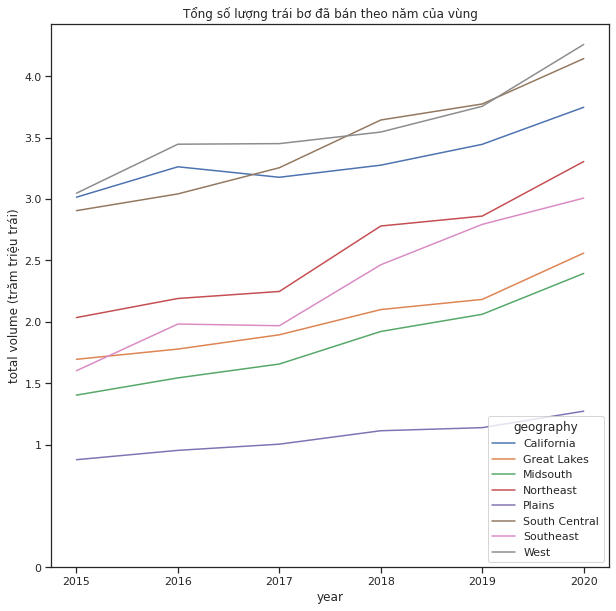

In [ ]:
plt.figure(figsize=(10,10))
sns.lineplot(data=area_year, x="year", y="total_volume", hue="geography", legend=True)

plt.title('Tổng số lượng trái bơ đã bán theo năm của vùng')
plt.yticks([0, 100000000, 150000000, 200000000, 250000000, 300000000, 350000000, 400000000],[0, 1, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0])
plt.xlabel('year')
plt.ylabel('total volume (trăm triệu trái)')
plt.show()

nhận xét:

    West là vùng có số lượng bán ra nhiều nhất qua tất cả các thời điểm
    vì vậy có thể suy nghĩ về việc đầu tư vào thị trường này

In [ ]:
city_year = data_avocado.groupby(['year','geography']).sum().query('geography == ["Las Vegas", "Phoenix/Tucson", "Portland", "Boise", "Seattle", "Denver", "West Tex/New Mexico", "Spokane"]')
city_year = pd.DataFrame(city_year).reset_index()
city_year = city_year.astype({"geography":'object'})
city_year



year            geography  average_price  total_volume         4046  \
0   2015                Boise         142.87    3784357.34   2389516.89   
1   2015               Denver         123.53   39190343.42   7691728.69   
2   2015            Las Vegas         142.36   15542428.66   6605406.06   
3   2015       Phoenix/Tucson         120.34   57176285.48  40701731.16   
4   2015             Portland         135.91   27943455.35   8408542.31   
5   2015              Seattle         147.91   29057099.45   8816138.09   
6   2015              Spokane         145.64    4181687.17   1585157.66   
7   2015  West Tex/New Mexico         129.71   41523998.11  26726893.18   
8   2016                Boise         118.76    4653509.53   1824363.91   
9   2016               Denver         113.69   45307762.05   8063375.71   
10  2016            Las Vegas         140.65   16907013.56   6561975.45   
11  2016       Phoenix/Tucson         130.91   59283687.23  34267073.65   
12  2016             Portland         123.93   37311511.88   6063324.09   
13  2016              Seattle         135.23   37188418.42   5006233.81   
14  2016              Spokane         138.69    5006166.54   1127577.04   
15  2016  West Tex/New Mexico         129.65   43807431.60  25465275.80   
16  2017                Boise         158.22    4760561.31   2008107.73   
17  2017               Denver         143.92   42559077.12   8405850.38   
18  2017            Las Vegas         150.29   17433832.68   5690764.75   
19  2017       Phoenix/Tucson         134.89   61170534.26  30978902.28   
20  2017             Portland         152.04   36899453.91   7757574.61   
21  2017              Seattle         169.53   35027565.74   6298490.35   
22  2017              Spokane         170.08    5151528.30   1094228.72   
23  2017  West Tex/New Mexico         133.28   47389589.29  26231542.68   
24  2018                Boise         150.77    4838914.56   2013969.60   
25  2018               Denver         128.97   46270275.94   8502461.85   
26  2018            Las Vegas         133.89   17852762.50   3776334.59   
27  2018       Phoenix/Tucson         110.21   65078641.94  29088446.00   
28  2018             Portland         144.31   33956269.95   3628053.14   
29  2018              Seattle         155.38   31292148.93   5245296.76   
30  2018              Spokane         150.65    4916883.19   1125427.26   
31  2018  West Tex/New Mexico         120.30   45180555.74  20832118.33   
32  2019                Boise         172.94    5531242.95   1970558.68   
33  2019               Denver         150.72   49170734.87   9259850.72   
34  2019            Las Vegas         149.39   19355350.84   3721298.78   
35  2019       Phoenix/Tucson         138.61   67771877.34  23875650.44   
36  2019             Portland         171.29   35185420.53   3678784.10   
37  2019              Seattle         180.91   32811480.40   4723791.25   
38  2019              Spokane         172.84    5276314.13   1109976.77   
39  2019  West Tex/New Mexico         138.91   47061851.64  20747515.93   
40  2020                Boise         136.03    6790966.87   1822009.32   
41  2020               Denver         112.18   55431335.50  10545297.50   
42  2020            Las Vegas         114.84   21759364.19   3410353.85   
43  2020       Phoenix/Tucson         105.13   72042387.34  20994603.08   
44  2020             Portland         135.19   42247662.61   5533759.73   
45  2020              Seattle         155.93   37025862.90   4229861.33   
46  2020              Spokane         142.09    6248421.45   1045890.00   
47  2020  West Tex/New Mexico         111.21   55648139.92  19059544.30   

           4225        4770   total_bags   small_bags   large_bags  \
0     600720.40   276085.54    518034.51    482717.44     33605.66   
1   21745054.64   746570.63   9006989.46   2865284.79   6138360.10   
2    6074909.37   327041.41   2535071.82   2022006.86    513049.68   
3   11220627.51   431159.51   4822767.30   38765

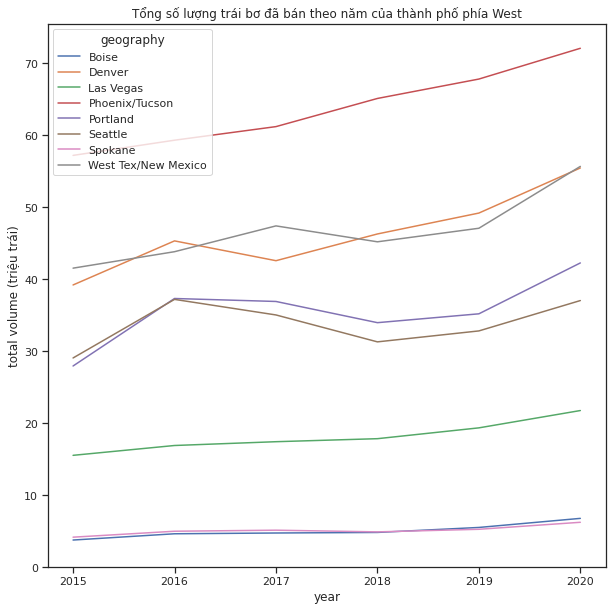

In [ ]:
plt.figure(figsize=(10,10))
sns.lineplot(data=city_year, x="year", y="total_volume", hue="geography", legend=True)

plt.title('Tổng số lượng trái bơ đã bán theo năm của thành phố phía West')
plt.yticks([0, 10000000, 20000000, 30000000, 40000000, 50000000, 60000000, 70000000],[0, 10, 20, 30, 40, 50, 60, 70])
plt.xlabel('year')
plt.ylabel('total volume (triệu trái)')
plt.show()

Phoenix/Tucson là thành phố có số lượng bán ra nhiều nhất qua tất cả các thời điểm
vì vậy có thể đầu tư vào thị trường này